<img src="https://static.dezeen.com/uploads/2016/08/designstudiopremier-league-rebrand-relaunch-logo-design-barclays-football_dezeen_slideshow-a.jpg" alt="Drawing" style="width: 200px;"/>

# <font color=blue>Data Analysis<font/>
# <font color=blue>English Premier League - Seasons 2009 - 2019<font/>

## Author: <font color=brown>AKHIL JAMES<font/> 
##### <font color=blue>Linkedin: [http://www.linkedin.com/in/akhil-james7](http://www.linkedin.com/in/akhil-james7)<font/>
##### <font color=blue>GitHub: https://github.com/aj7amigo<font/>
##### <font color=blue>Data Source: https://www.football-data.co.uk/data.php<font/>

#### Prior to writing the code, it is advised to look at the files using microsoft excel.<br> This gives us a good overview of how the data is organised and how the code should be written to fetch the data correctly.

# <font color=brown>Data Wrangling<font/>

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 2. Combine all the data across 10 seasons into one file 

In [2]:
path = os.getcwd()  #path to current folder
all_files = glob.glob(path + "/*.xlsx") #get all excel files

combined_data = pd.DataFrame()  #empty df

#for loop to read all excel files and combine datas
for filename in all_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    combined_data = combined_data.append(df)
    
combined_data.to_excel('decade_data.xlsx', index = None, header=True)  #saving all data into an excel

## 3. Load the data as a pandas data frame and make a copy 

In [3]:
ten_seasons_data = pd.read_excel('decade_data.xlsx')
decade_data = ten_seasons_data.copy()

## 4. Print the data frame and identify relevant and irrelevant columns

In [4]:
pd.set_option('display.max_rows', None, 'display.max_columns', None) #display all columns
decade_data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,BSH,BSD,BSA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA
0,E0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,14,5,7,15,14,4,6,2,2,0,0,1.67,3.60,5.50,1.65,3.40,5.00,1.67,3.50,5.25,1.7,3.5,4.9,1.67,3.3,4.50,1.65,3.40,5.0,1.70,3.4,5.50,1.67,3.60,5.50,1.70,3.4,5.0,1.62,3.5,5.5,37,1.72,1.66,3.77,3.51,6.05,5.33,32,2.04,1.92,1.91,1.81,21.0,0.0,1.28,1.22,4.40,3.99,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,8,9,5,12,9,5,4,2,1,0,0,3.60,3.25,2.10,3.40,3.15,2.00,3.40,3.25,2.10,3.2,3.2,2.2,3.00,3.2,2.10,3.15,3.25,2.1,3.50,3.2,2.15,3.30,3.25,2.20,3.25,3.2,2.2,3.30,3.2,2.2,38,3.78,3.37,3.35,3.24,2.25,2.12,33,2.15,2.04,1.78,1.71,24.0,0.0,2.58,2.38,1.60,1.54,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,20,3,13,16,10,4,7,2,1,0,0,2.25,3.25,3.25,2.15,3.15,3.15,2.25,3.25,3.10,2.2,3.2,3.2,2.10,3.2,3.00,2.25,3.20,2.9,2.30,3.2,3.20,2.30,3.25,3.10,2.25,3.2,3.1,2.20,3.2,3.3,38,2.37,2.24,3.31,3.20,3.40,3.15,33,2.25,2.12,1.70,1.66,23.0,0.0,1.68,1.61,2.33,2.23,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,7,12,3,13,15,12,4,1,2,0,0,1.17,6.50,21.00,1.17,6.00,13.00,1.20,6.00,15.00,1.2,5.5,14.0,1.17,5.5,12.00,1.17,5.75,15.0,1.17,6.5,21.00,1.18,6.50,17.00,1.17,6.0,17.0,1.20,5.5,19.0,38,1.20,1.17,7.71,6.26,23.14,16.39,34,1.67,1.58,2.44,2.26,22.0,0.0,1.03,1.02,17.05,12.96,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,3.20,3.25,2.30,2.95,3.15,2.25,3.00,3.25,2.30,3.1,3.1,2.3,2.88,3.0,2.25,3.00,3.20,2.2,3.20,3.2,2.30,3.25,3.25,2.25,2.90,3.3,2.3,3.25,3.2,2.2,38,3.34,3.07,3.34,3.21,2.42,2.28,34,2.20,2.06,1.77,1.70,24.0,0.0,2.27,2.20,1.73,1.63,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Drop irrelevant columns

#### We see that from column 'B365H' till the end, the data is related to betting stats and not related to the match results.<br>As we focus on only team stats, we drop the data from this column to the end.

In [5]:
decade_data.drop(decade_data.iloc[:, 23:], inplace=True, axis=1)

#### Also the first column (Div) has only one entry E0 which is not useful in analysis. We drop this column too.

In [6]:
decade_data = decade_data.drop(['Div'], axis=1)

In [7]:
decade_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,14,5,7,15,14,4,6,2,2,0,0
1,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,8,9,5,12,9,5,4,2,1,0,0
2,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,20,3,13,16,10,4,7,2,1,0,0
3,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,7,12,3,13,15,12,4,1,2,0,0
4,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0


## 6. Look if any data is missing

#### We have two methods<br><br>First we can use the describe method as below to get details of the complete data frame

In [8]:
decade_data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.570526,1.180000,0.691579,0.522368,14.181842,11.229474,6.014474,4.764211,10.618684,11.133947,6.028684,4.774474,1.478421,1.771316,0.059474,0.087105
std,1.322363,1.160788,0.838739,0.735319,5.514473,4.686764,3.443761,2.891598,3.397368,3.580563,3.132163,2.737614,1.198647,1.284515,0.244206,0.294804
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,3.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,13.000000,13.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,7.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,24.000000,26.000000,19.000000,19.000000,7.000000,9.000000,2.000000,2.000000


#### We can see that each column has a count of 3800. So we don't see any missing data.<br><br><br>Another method is to check for NULL values in any columns

In [9]:
decade_data.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

#### As expected, we don't see any null values in any columns.

## 7. Check the datatypes of each column

In [10]:
decade_data.dtypes

Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG                 int64
HTAG                 int64
HTR                 object
Referee             object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HF                   int64
AF                   int64
HC                   int64
AC                   int64
HY                   int64
AY                   int64
HR                   int64
AR                   int64
dtype: object

#### All columns are either object or int except the date column.

## 8. Rename Columns to understand the contents from column title

In [11]:
decade_data.columns = ['Date','HomeTeam','AwayTeam','FT_Home_Goal','FT_Away_Goal','FT_Result','HT_Home_Goal','HT_Away_Goal',
                        'HT_Result','Referee','H_Shots','A_Shots','H_Shots_Target','A_Shots_Target','H_Foul',
                        'A_Foul','H_Corner','A_Corner','H_Yellow','A_Yellow','H_Red','A_Red']

In [12]:
decade_data.head()

,Date,HomeTeam,AwayTeam,FT_Home_Goal,FT_Away_Goal,FT_Result,HT_Home_Goal,HT_Away_Goal,HT_Result,Referee,H_Shots,A_Shots,H_Shots_Target,A_Shots_Target,H_Foul,A_Foul,H_Corner,A_Corner,H_Yellow,A_Yellow,H_Red,A_Red
0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,14,5,7,15,14,4,6,2,2,0,0
1,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,8,9,5,12,9,5,4,2,1,0,0
2,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,20,3,13,16,10,4,7,2,1,0,0
3,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,7,12,3,13,15,12,4,1,2,0,0
4,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0


## <font color=green>The data is now well prepared to proceed with analysis <font/>

# <font color=brown>Data Analysis<font/>

## <font color=blue>1. Howmany matches were played in EPL between 2009 - 2019?<br>$\;\;$ Howmany teams played in the EPL during these 10 seasons?<br> $\;\;$ Which are they?<font/>

#### <font color=violet>We basically have to get the number of entries in any column.<font/>

In [13]:
total_matches = decade_data['Date'].count()
print('Total matches played during the 10 seasons is : ' +str(total_matches))

Total matches played during the 10 seasons is : 3800


#### <font color=violet>Since every team has played home and away, we need to focus on only one of the 2 columns, HomeTeam and AwayTeam.<br>Find the unique entry in the HomeTeam Column and count the number of unique entries.<font/>

In [14]:
all_teams = decade_data['HomeTeam'].unique()
all_teams_count = decade_data['HomeTeam'].nunique()
print('Total teams which played in the EPL during the ten seasons : '+str(all_teams_count))
print('\n')
print('The teams are : \n'+str(all_teams))

Total teams which played in the EPL during the ten seasons : 36


The teams are : 
['Aston Villa' 'Blackburn' 'Bolton' 'Chelsea' 'Everton' 'Portsmouth'
 'Stoke' 'Wolves' 'Man United' 'Tottenham' 'Sunderland' 'Wigan'
 'Birmingham' 'Burnley' 'Hull' 'Liverpool' 'Arsenal' 'Man City' 'Fulham'
 'West Ham' 'West Brom' 'Newcastle' 'Blackpool' 'QPR' 'Swansea' 'Norwich'
 'Reading' 'Southampton' 'Crystal Palace' 'Cardiff' 'Leicester'
 'Bournemouth' 'Watford' 'Middlesbrough' 'Brighton' 'Huddersfield']


## <font color=blue>2. Howmany games were played by each team in these 10 seasons?<br>$\;\;$ Plot it as a bar chart.<font/>

#### <font color=violet>We need to get the value counts of each team in Home and Away games and add it to get the total matches played by each team.<font/>

In [15]:
total_games_each_team = decade_data['HomeTeam'].value_counts() + decade_data['AwayTeam'].value_counts()
each_team_games = pd.DataFrame(total_games_each_team).sort_index(axis = 0) 
each_team_games.columns = ['Total Games']
each_team_games

,Total Games
Arsenal,380
Aston Villa,266
Birmingham,76
Blackburn,114
Blackpool,38
Bolton,114
Bournemouth,152
Brighton,76
Burnley,190
Cardiff,76


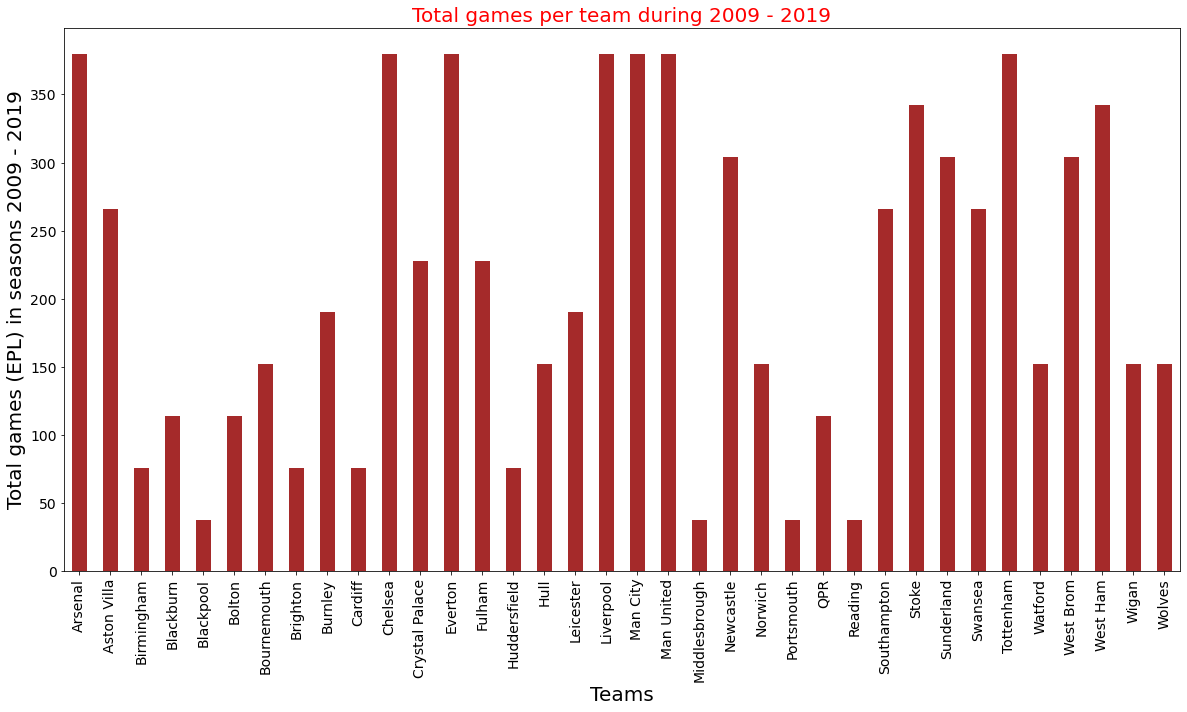

In [16]:
each_team_games.plot(kind='bar',color='brown', legend=False, figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Teams',fontsize=20)
plt.ylabel('Total games (EPL) in seasons 2009 - 2019',fontsize=20)
plt.title('Total games per team during 2009 - 2019',fontsize=20, color='red')
plt.show()

## <font color=blue>3. Which teams played all the seasons in EPL from 2009 - 2019?<br>$\;\;$ Which teams played only 1 season in EPL between 2009 - 2019?<font/>

#### <font color=violet>To find this, we need the following info.<br>Total games per team per season is 38.<br><br><font/><font color=violet>So, if a team played all 10 seasons, the total games played will be 380.<br>We search for all teams who played 380 games.<font/>

In [17]:
ten_season_teams = each_team_games[each_team_games['Total Games']==380]
ten_season_teams

,Total Games
Arsenal,380
Chelsea,380
Everton,380
Liverpool,380
Man City,380
Man United,380
Tottenham,380


#### <font color=violet>Also, if a team played only one season, total games played is 38.<br>So, we search for all teams who played only 38 games.<font/>


In [18]:
one_season_teams = each_team_games[each_team_games['Total Games']==38]
one_season_teams

,Total Games
Blackpool,38
Middlesbrough,38
Portsmouth,38
Reading,38


## <font color=blue>4. Howmuch percent of the total matches were won by the home team, away team or draw?<br>$\;\;$ Show the data in a pie chart.<font/>

#### <font color=violet>To solve this, we focus on the column 'FT_Result' which contains info on the match result.<br>We look for the number of home team wins, away team wins and draws from this column.<font/>

In [19]:
all_matches_results = pd.DataFrame(decade_data['FT_Result'].value_counts())
all_matches_results

,FT_Result
H,1758
A,1102
D,940


Text(0.5, 1.0, 'Percentage share of match results')

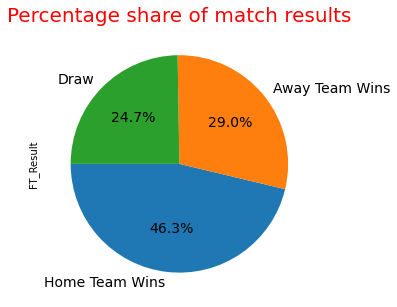

In [20]:
labels = ['Home Team Wins','Away Team Wins','Draw']
all_matches_results.plot(kind='pie', y = 'FT_Result', autopct='%1.1f%%', 
 startangle=180, shadow=False, labels=labels, legend = False, fontsize=14, figsize=(5,5))
plt.title('Percentage share of match results',fontsize=20, color='red')

## <font color=blue>5. Howmany referees officiated the EPL matches between 2009 and 2019?<br>$\;\;$ List them with the total number of matches officiated.<br>$\;\;$ Show the data as a horizontal bar plot.<font/>

#### <font color=violet>We focus on the column 'Referee' which contains info on who officiated the match.<br>We look for the referee names and number of matches officiated by each of them.<font/>

In [21]:
referees_count = decade_data['Referee'].nunique()
print('Number of referees who officiated the EPL matches between 2009 and 2019 : '+str(referees_count))
all_referees = pd.DataFrame(decade_data['Referee'].value_counts()).sort_index(axis = 0)
all_referees

Number of referees who officiated the EPL matches between 2009 and 2019 : 30


,Referee
A Madley,2
A Marriner,253
A Taylor,226
A Wiley,26
C Foy,135
C Kavanagh,40
C Pawson,134
D Coote,12
G Scott,50
H Webb,147


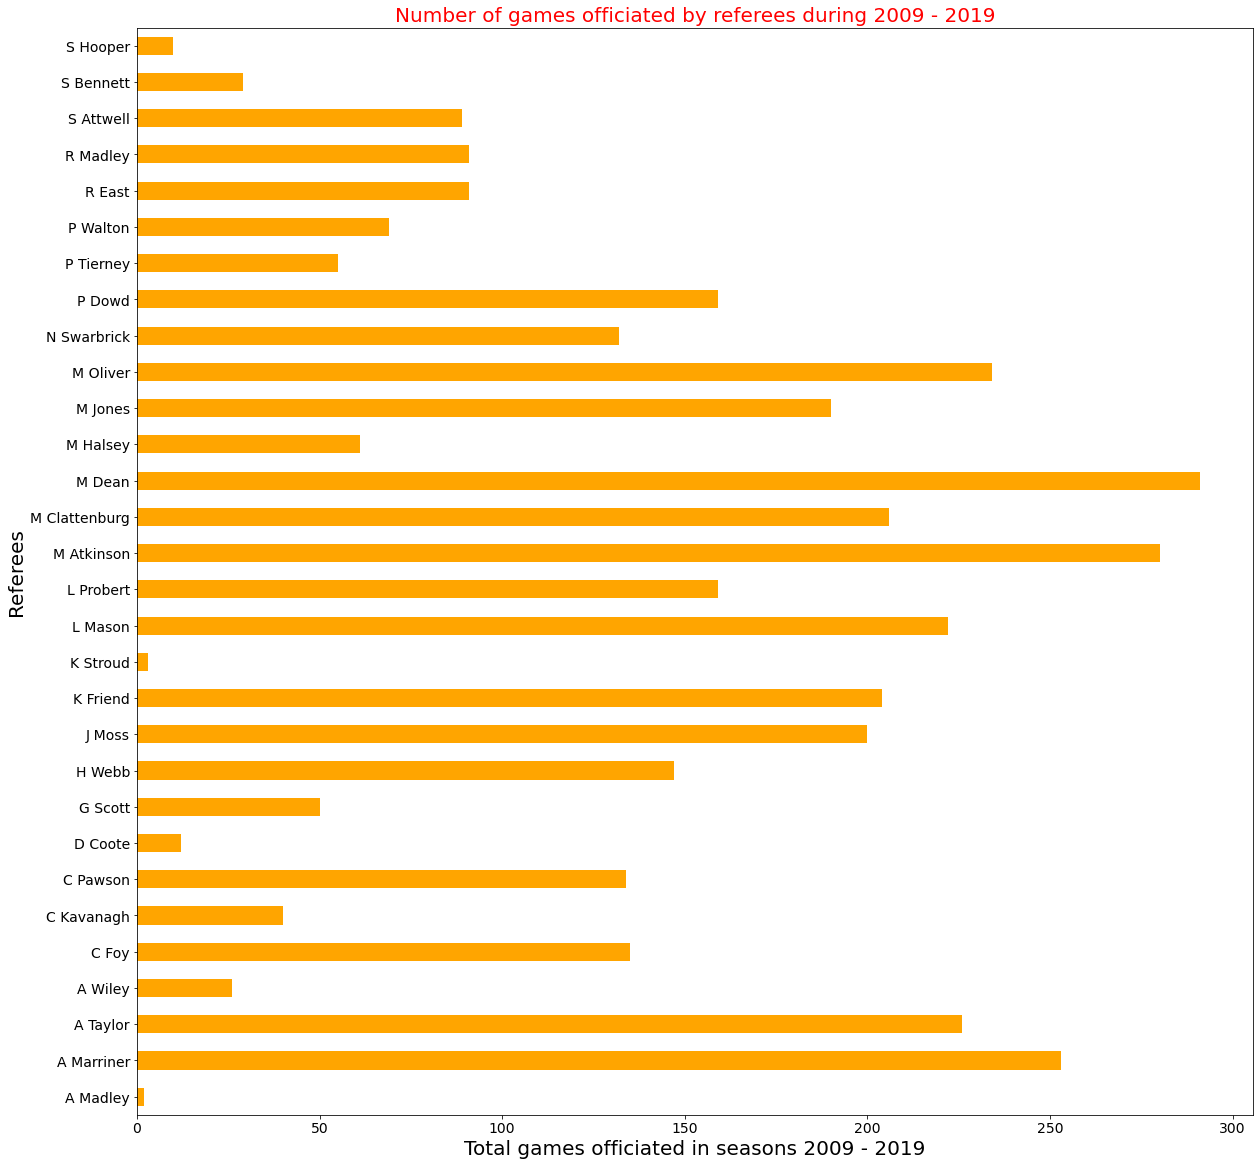

In [22]:
all_referees.plot(kind='barh',color='orange', legend=False, figsize=(20,20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Referees',fontsize=20)
plt.xlabel('Total games officiated in seasons 2009 - 2019',fontsize=20)
plt.title('Number of games officiated by referees during 2009 - 2019',fontsize=20, color='red')
plt.show()

## <font color=blue>6. In howmany games did the teams loosing at half time come back to win the game at full time (comeback wins)? List all of them.

#### <font color=violet>We need to focus on two columns 'HT_Result' and 'FT_Result'.<br>We need to look for two sets of data.<br>1. Away team winning at half time and Home team wins at full time.<br>2. Home team winning at half time and Away team wins at full time<font/>

In [23]:
come_backs = decade_data[((decade_data['HT_Result']=='A') & (decade_data['FT_Result']=='H'))
                         | 
                         ((decade_data['HT_Result']=='H') & (decade_data['FT_Result']=='A'))]

come_back_wins = come_backs.shape[0]

print('Number of games in which teams loosing at half time come back to win the game at full time : '+str(come_back_wins))

Number of games in which teams loosing at half time come back to win the game at full time : 153


In [24]:
#come_backs
come_backs.head()

,Date,HomeTeam,AwayTeam,FT_Home_Goal,FT_Away_Goal,FT_Result,HT_Home_Goal,HT_Away_Goal,HT_Result,Referee,H_Shots,A_Shots,H_Shots_Target,A_Shots_Target,H_Foul,A_Foul,H_Corner,A_Corner,H_Yellow,A_Yellow,H_Red,A_Red
10,2009-08-18,Sunderland,Chelsea,1,3,A,1,0,H,S Bennett,4,20,3,9,14,10,1,14,2,2,0,0
29,2009-08-29,Man United,Arsenal,2,1,H,0,1,A,M Dean,10,9,4,3,21,15,6,5,3,6,0,0
45,2009-09-13,Fulham,Everton,2,1,H,0,1,A,P Walton,14,6,8,6,6,10,5,3,1,0,0,0
108,2009-11-07,Blackburn,Portsmouth,3,1,H,0,1,A,A Marriner,10,9,6,3,12,18,8,5,3,3,0,0
113,2009-11-08,Hull,Stoke,2,1,H,0,1,A,M Dean,16,7,8,4,12,14,4,2,1,4,0,1


## <font color=blue>7. Sort the comeback wins based on year.<font/>

#### <font color=violet>We need to group the above findings about comeback wins on a yearly basis.<font/>

In [25]:
come_backs_year_sort = pd.DataFrame()
come_backs_year_sort['comeback_wins_per_year'] = come_backs['FT_Result'].groupby([come_backs.Date.dt.year]).agg('count')
come_backs_year_sort

,comeback_wins_per_year
Date,
2009,8
2010,16
2011,14
2012,18
2013,16
2014,11
2015,11
2016,19
2017,12


## <font color=blue>8. Sort the comeback wins based on season.<br>$\;\;$ Make a donut plot of comeback wins split among seasons.<br>$\;\;$ Highlight the season with most comeback wins.<font/>

#### <font color=violet>Since we don't have a info about the season in the data frame, we use the following info.<br>Each EPL season has 380 games.<br>So we can make a new column called season which changes after every 380 games.<font/>

In [26]:
season_start=9
season_end=10
season_list = []

for x in range (10):
    for y in range (380):
        season_list.append(('0'+str(season_start)+'-'+str(season_end))[-5:]) # the value '0' is added to make 9 as 09.
    season_start = season_start + 1
    season_end = season_end + 1

#### <font color=violet>In the above step, we made an empty list and added the seasons into it changing every 380 games.<br>We will convert this list into a pandas dataframe and later concatenate this data frame with the decade_data.<br><font/>

In [27]:
season_df = pd.DataFrame({'Season':season_list})

decade_data_by_seasons = pd.concat([season_df,decade_data], axis=1)
decade_data_by_seasons.head()

,Season,Date,HomeTeam,AwayTeam,FT_Home_Goal,FT_Away_Goal,FT_Result,HT_Home_Goal,HT_Away_Goal,HT_Result,Referee,H_Shots,A_Shots,H_Shots_Target,A_Shots_Target,H_Foul,A_Foul,H_Corner,A_Corner,H_Yellow,A_Yellow,H_Red,A_Red
0,09-10,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,14,5,7,15,14,4,6,2,2,0,0
1,09-10,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,8,9,5,12,9,5,4,2,1,0,0
2,09-10,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,20,3,13,16,10,4,7,2,1,0,0
3,09-10,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,7,12,3,13,15,12,4,1,2,0,0
4,09-10,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0


#### <font color=violet>We group the comeback wins based on season.<font/>

In [28]:
come_backs_updated = decade_data_by_seasons[
                        ((decade_data_by_seasons['HT_Result']=='A') & (decade_data_by_seasons['FT_Result']=='H'))
                         | 
                         ((decade_data_by_seasons['HT_Result']=='H') & (decade_data_by_seasons['FT_Result']=='A'))]


come_backs_season_sort = pd.DataFrame()
come_backs_season_sort['comeback_wins_per_season'] = come_backs['FT_Result'].groupby([come_backs_updated.Season]).agg('count')
come_backs_season_sort

,comeback_wins_per_season
Season,
09-10,17
10-11,16
11-12,10
12-13,21
13-14,14
14-15,11
15-16,17
16-17,12
17-18,18


#### <font color=violet>We now split the total 153 comeback wins among 10 seasons in a donut plot.<br>We use explode method in pie chart to highlight the season with most comeback wins.<font/>

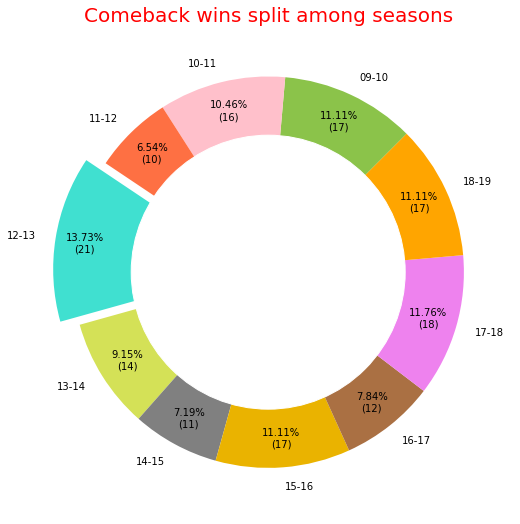

In [29]:
def value_and_percentage(x): 
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)


plt.figure(figsize=(9,9))
values = come_backs_season_sort['comeback_wins_per_season']
labels = decade_data_by_seasons['Season'].unique()
total = np.sum(values)
colors = ['#8BC34A','Pink','#FE7043','Turquoise','#D4E157','Grey','#EAB300','#AA7043','Violet','Orange']
plt.pie (values , labels= labels , colors= colors , 
         startangle=45 , autopct=value_and_percentage, pctdistance=0.85, 
         explode=[0,0,0,0.1,0,0,0,0,0,0] )
my_circle=plt.Circle( (0,0), 0.7, color='white') # Adding circle at the centre
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Comeback wins split among seasons',fontsize=20, color='red')
plt.show()

## <font color=blue>9. Generate a data frame with the following info,<br>$\;\;\;\;$ a. Number of games per team.<br>$\;\;\;\;$ b. Home wins per team.<br>$\;\;\;\;$ c. Home defeats per team.<br>$\;\;\;\;$ d. Away wins per team.<br>$\;\;\;\;$ e. Away defeats per team.<br>$\;\;\;\;$ f. Number of draw per teams (home and away combined).<br>$\;\;\;\;$ g. Total points in EPL across 10 seasons.<font/>

#### <font color=violet>a. We already have the total games played by each team in the data frame each_team_games.<font/>

In [30]:
## No need of any computation here. We can call the dataframe each_team_games when needed.

#### <font color=violet>b. We group HomeTeam when Full time result was home team win.<font/>

In [31]:
home_team_wins = (decade_data_by_seasons[decade_data_by_seasons['FT_Result']=='H']
                  .groupby([decade_data_by_seasons.HomeTeam]).agg('count'))[['FT_Result']]
home_team_wins.columns = ['Home_Wins']
home_team_wins.index.names = ['Team']

#### <font color=violet>c. We group HomeTeam when Full time result was away team win.<font/>

In [32]:
home_team_loss = (decade_data_by_seasons[decade_data_by_seasons['FT_Result']=='A']
                  .groupby([decade_data_by_seasons.HomeTeam]).agg('count'))[['FT_Result']]
home_team_loss.columns = ['Home_Loss']
home_team_loss.index.names = ['Team']

#### <font color=violet>d. We group AwayTeam when Full time result was away team win.<font/>

In [33]:
away_team_wins = (decade_data_by_seasons[decade_data_by_seasons['FT_Result']=='A']
                  .groupby([decade_data_by_seasons.AwayTeam]).agg('count'))[['FT_Result']]
away_team_wins.columns = ['Away_Wins']
away_team_wins.index.names = ['Team']

#### <font color=violet>e. We group AwayTeam when Full time result was home team win.<font/>

In [34]:
away_team_loss = (decade_data_by_seasons[decade_data_by_seasons['FT_Result']=='H']
                  .groupby([decade_data_by_seasons.AwayTeam]).agg('count'))[['FT_Result']]
away_team_loss.columns = ['Away_Loss']
away_team_loss.index.names = ['Team']

#### <font color=violet>f. We group HomeTeam when Full time result was draw and group AwayTeam when Full time result was draw. Finally, we add them both.<font/>

In [35]:
home_team_draw = (decade_data_by_seasons[decade_data_by_seasons['FT_Result']=='D']
                  .groupby([decade_data_by_seasons.HomeTeam]).agg('count'))[['FT_Result']]
home_team_draw.columns = ['Home_Draw']
home_team_draw.index.names = ['Team']


away_team_draw = (decade_data_by_seasons[decade_data_by_seasons['FT_Result']=='D']
                  .groupby([decade_data_by_seasons.AwayTeam]).agg('count'))[['FT_Result']]
away_team_draw.columns = ['Away_Draw']
away_team_draw.index.names = ['Team']


total_draw_matches = home_team_draw['Home_Draw'] + away_team_draw['Away_Draw']
home_and_away_draws = pd.DataFrame(total_draw_matches)
home_and_away_draws.columns = ['Draws-Home_and_Away']

#### <font color=violet>g. To calculate this, we need the following info.<br>$\;\;\;\;$Each win gives 3 points, each draw gives 1 point and each loss gives 0 points.<font/>

In [36]:
total_wins = home_team_wins['Home_Wins'] + away_team_wins['Away_Wins']
home_and_away_wins = pd.DataFrame(total_wins)
home_and_away_wins.columns = ['Wins-Home_and_Away']

total_points_decade = (home_and_away_wins['Wins-Home_and_Away'] * 3 ) + (home_and_away_draws['Draws-Home_and_Away'])

ten_season_points = pd.DataFrame(total_points_decade)
ten_season_points.columns = ['Total_points_in_decade']

#### <font color=violet>Finally we concatenate dataframes from steps a to g into one single data frame<font/>

In [37]:
teams_stats_table = pd.concat([each_team_games, home_team_wins, home_team_loss, away_team_wins, 
                               away_team_loss, home_and_away_draws, ten_season_points], axis=1)
teams_stats_table

,Total Games,Home_Wins,Home_Loss,Away_Wins,Away_Loss,Draws-Home_and_Away,Total_points_in_decade
Team,,,,,,,
Arsenal,380,129,24,84,63,80,719
Aston Villa,266,38,54,31,66,77,284
Birmingham,76,14,7,7,22,26,89
Blackburn,114,23,20,9,34,28,124
Blackpool,38,5,9,5,10,9,39
Bolton,114,20,22,12,35,25,121
Bournemouth,152,29,28,18,41,36,177
Brighton,76,13,12,5,24,22,76
Burnley,190,35,38,16,57,44,197


## <font color=blue>10. Extract the total points gained by teams who played in all 10 seasons.<br>$\;\;\;\;$ Plot the result as a bar chart with values of each bar indicated on top.<font/>

#### <font color=violet>To extract the info from the dataframe created above, we need to match the index of the the dataframe 'teams_stats_table' with that of 'ten_season_teams' and extract the column 'Total_points_in_decade'.<font/>

In [38]:
allseason_teams = teams_stats_table[teams_stats_table.index.isin(ten_season_teams.index)]
allseason_teams_points = pd.DataFrame(allseason_teams['Total_points_in_decade'])
allseason_teams_points

,Total_points_in_decade
Team,
Arsenal,719
Chelsea,750
Everton,564
Liverpool,688
Man City,812
Man United,759
Tottenham,710


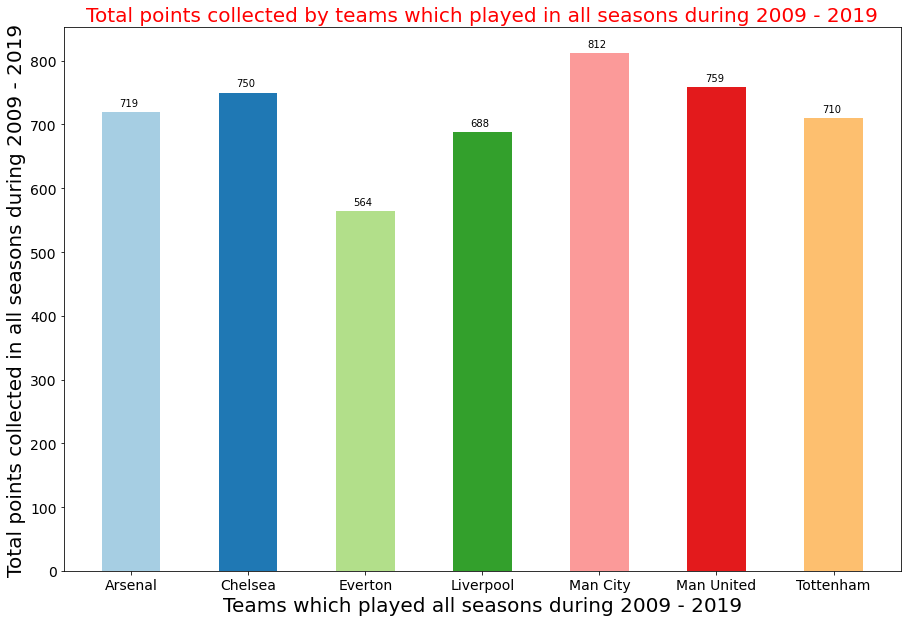

In [39]:
plt.rcParams["figure.figsize"] = (15,10)
plt.bar(allseason_teams_points.index, allseason_teams_points['Total_points_in_decade'], 
        color=plt.cm.Paired((np.arange(len(allseason_teams_points)))),width = 0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Teams which played all seasons during 2009 - 2019',fontsize=20)
plt.ylabel('Total points collected in all seasons during 2009 - 2019',fontsize=20)
plt.title('Total points collected by teams which played in all seasons during 2009 - 2019',fontsize=20, color='red')

x_cord = -0.1
for z in range (len(allseason_teams_points)):
    plt.text(x_cord, allseason_teams_points.Total_points_in_decade[z] + 10, allseason_teams_points.Total_points_in_decade[z])
    x_cord = x_cord + 1
    
plt.show()

## <font color=blue>11. Which game/games produced most number of goals? List them.<font/>

#### <font color=violet>We should add the FT_Home_Goal and the FT_Away_Goal values of each game and find the maximum goals scored in a single game. Then find all the games in which the maximum goals were scored.<font/>

In [40]:
max_goals_per_game = (decade_data_by_seasons['FT_Home_Goal'] + decade_data_by_seasons['FT_Away_Goal']).max()

print('Maximum number of goals scored in a single game is : '+str(max_goals_per_game))

Maximum number of goals scored in a single game is : 10


In [41]:
decade_data_by_seasons[(decade_data_by_seasons['FT_Home_Goal'] + decade_data_by_seasons['FT_Away_Goal']) == max_goals_per_game]

,Season,Date,HomeTeam,AwayTeam,FT_Home_Goal,FT_Away_Goal,FT_Result,HT_Home_Goal,HT_Away_Goal,HT_Result,Referee,H_Shots,A_Shots,H_Shots_Target,A_Shots_Target,H_Foul,A_Foul,H_Corner,A_Corner,H_Yellow,A_Yellow,H_Red,A_Red
126,09-10,2009-11-22,Tottenham,Wigan,9,1,H,1,0,H,P Walton,28,11,16,5,9,11,10,5,1,0,0,0
785,11-12,2011-08-28,Man United,Arsenal,8,2,H,3,1,H,H Webb,25,19,15,13,9,7,3,5,2,3,0,1
1328,12-13,2012-12-29,Arsenal,Newcastle,7,3,H,1,1,D,C Foy,16,10,12,8,8,10,5,6,0,1,0,0
1517,12-13,2013-05-19,West Brom,Man United,5,5,D,1,3,A,M Oliver,15,12,8,8,10,6,3,5,0,1,0,0


## <font color=blue>12. Find out the total goals scored by each team at home, away and in total.<br>$\;\;\;\;$ Find the average goals scored per game at home and away (not combined).<br>$\;\;\;\;$ Represent it in a bar plot.<font/>

#### <font color=violet>We find out the total goals scored by each team in home and away and add them.<br>To find average goals per game at home and away, divide goals at home and away by half of total games.<font/>

In [42]:
each_team_home_goals = decade_data_by_seasons['FT_Home_Goal'].groupby(decade_data_by_seasons['HomeTeam']).sum()

each_team_away_goals = decade_data_by_seasons['FT_Away_Goal'].groupby(decade_data_by_seasons['AwayTeam']).sum()

each_team_goal_stats = pd.DataFrame(index = each_team_games.index)
each_team_goal_stats = pd.concat([each_team_games, pd.DataFrame(each_team_home_goals), pd.DataFrame(each_team_away_goals)
                                , pd.DataFrame(each_team_home_goals + each_team_away_goals) ], axis=1)

each_team_goal_stats.columns = ['Total Games', 'HomeGoals', 'AwayGoals', 'TotalGoals']

each_team_goal_stats['AvgGoals_homeGame'] = (each_team_goal_stats['HomeGoals']/(each_team_goal_stats['Total Games']/2)).round(2)
each_team_goal_stats['AvgGoals_awayGame'] = (each_team_goal_stats['AwayGoals']/(each_team_goal_stats['Total Games']/2)).round(2)

each_team_goal_stats

,Total Games,HomeGoals,AwayGoals,TotalGoals,AvgGoals_homeGame,AvgGoals_awayGame
Arsenal,380,410,319,729,2.16,1.68
Aston Villa,266,152,129,281,1.14,0.97
Birmingham,76,38,37,75,1.00,0.97
Blackburn,114,76,59,135,1.33,1.04
Blackpool,38,30,25,55,1.58,1.32
Bolton,114,83,57,140,1.46,1.00
Bournemouth,152,114,87,201,1.50,1.14
Brighton,76,43,26,69,1.13,0.68
Burnley,190,105,85,190,1.11,0.89
Cardiff,76,41,25,66,1.08,0.66


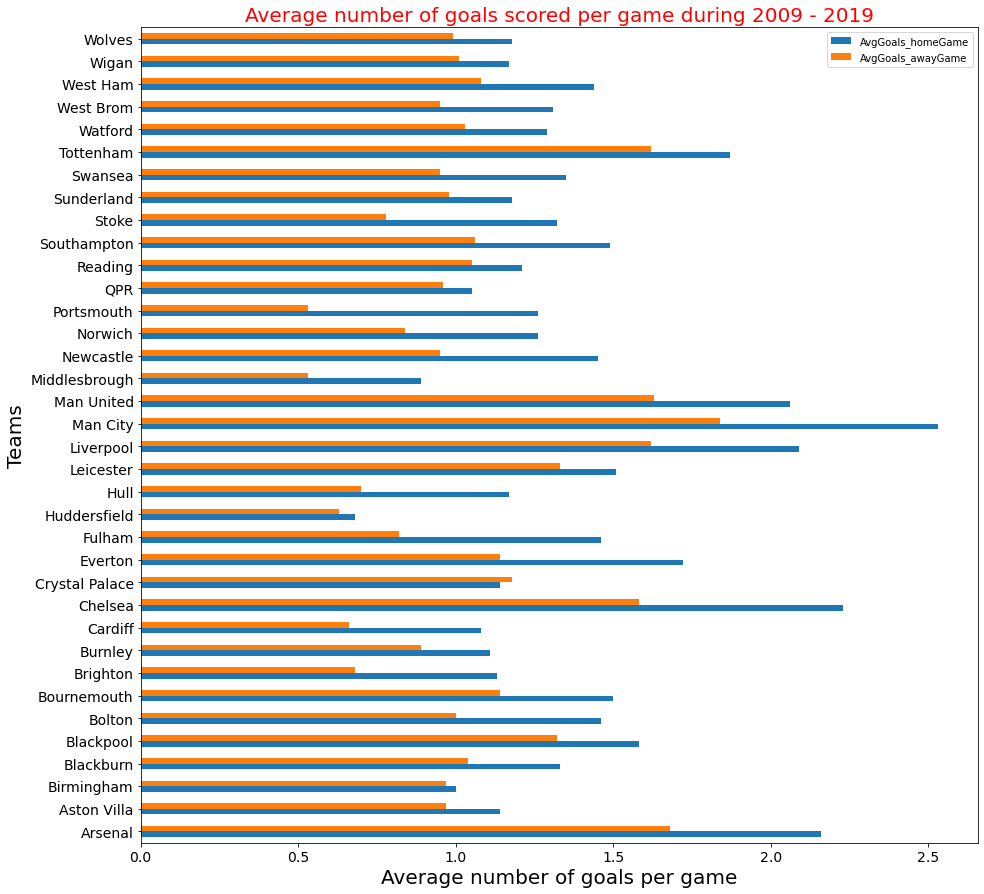

In [43]:
each_team_goal_stats.plot(y=["AvgGoals_homeGame", "AvgGoals_awayGame"], kind="barh", legend=True, figsize=(15,15))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Teams',fontsize=20)
plt.xlabel('Average number of goals per game',fontsize=20)
plt.title('Average number of goals scored per game during 2009 - 2019',fontsize=20, color='red') 
plt.show()

## <font color=blue>13. Find the total number of dominant performaces by each team.<br>$\;\;\;\;$ (Winning by a goal margin of 3 or more goals at Full Time).<br>$\;\;\;\;$ Represent it in a donut plot (seperate for home and away performances).<br>$\;\;\;\;$ Include teams with less than 10 dominant wins into a group called 'others' in plots.<font/>

#### <font color=violet>We group the dominant performances by home and away team and finally add them.<font/>

In [44]:
dominant_performances_home = decade_data_by_seasons[(decade_data_by_seasons['FT_Home_Goal'] - 
                                                     decade_data_by_seasons['FT_Away_Goal'] >= 3)
                                                   ].groupby([decade_data_by_seasons.HomeTeam]).agg('count')[['HomeTeam']]


dominant_performances_away = decade_data_by_seasons[(decade_data_by_seasons['FT_Away_Goal'] - 
                                                     decade_data_by_seasons['FT_Home_Goal'] >= 3)
                                                   ].groupby([decade_data_by_seasons.AwayTeam]).agg('count')[['AwayTeam']]

#since some teams have dominant performances only at home or away, we use merge by using index from both dataframes
dominant_performances = pd.merge(dominant_performances_home, dominant_performances_away, how = 'outer', 
                                 left_index=True, right_index=True)

dominant_performances.fillna(0, inplace = True)

dominant_performances['total_dominant_performances'] = dominant_performances['HomeTeam'] + dominant_performances['AwayTeam']

dominant_performances = dominant_performances.astype('int64')
dominant_performances

,HomeTeam,AwayTeam,total_dominant_performances
Arsenal,46,22,68
Aston Villa,7,1,8
Blackburn,2,0,2
Blackpool,0,1,1
Bolton,4,1,5
Bournemouth,5,5,10
Brighton,1,1,2
Burnley,2,2,4
Chelsea,41,24,65
Crystal Palace,6,4,10


#### <font color=violet>We create a category called others and the sum of all dominant performances less than 10 is assigned to it.<br>Then we select only teams whose dominant performances count is equal or more than 10.<br>We do it seperately for home and away performances.<font/>

In [45]:
others_home_dominant_games = dominant_performances[dominant_performances.HomeTeam < 10].sum()['HomeTeam']

others_away_dominant_games = dominant_performances[dominant_performances.AwayTeam < 10].sum()['AwayTeam']

In [46]:
dominant_home_games = pd.DataFrame(dominant_performances.HomeTeam)
others_home = pd.Series({'HomeTeam':others_home_dominant_games},name='Others')
dominant_home_games = dominant_home_games.append(others_home)
dominant_home_games = dominant_home_games[dominant_home_games.HomeTeam >= 10]
dominant_home_games

,HomeTeam
Arsenal,46
Chelsea,41
Everton,22
Fulham,11
Liverpool,50
Man City,59
Man United,38
Newcastle,16
Southampton,13
Sunderland,12


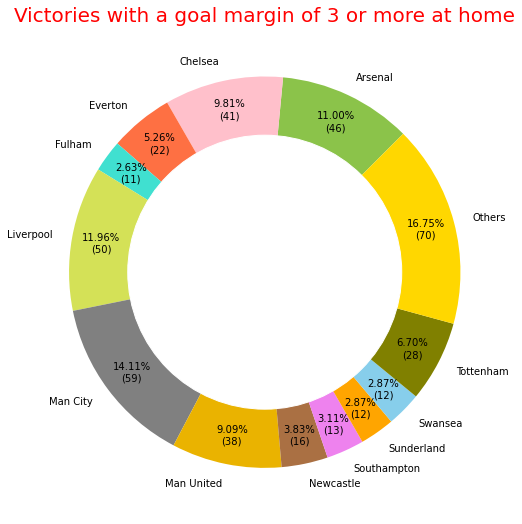

In [47]:
def value_and_percentage(x): 
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)


plt.figure(figsize=(9,9))
values = dominant_home_games['HomeTeam']
labels = dominant_home_games.index
total = np.sum(values)
colors = ['#8BC34A','Pink','#FE7043','Turquoise','#D4E157','Grey',
          '#EAB300','#AA7043','Violet','Orange','Skyblue','Olive','Gold']
plt.pie (values , labels= labels , colors= colors , 
         startangle=45 , autopct=value_and_percentage, pctdistance=0.85)
my_circle=plt.Circle( (0,0), 0.7, color='white') # Adding circle at the centre
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Victories with a goal margin of 3 or more at home',fontsize=20, color='red')
plt.show()

In [48]:
dominant_away_games = pd.DataFrame(dominant_performances.AwayTeam)
others_away = pd.Series({'AwayTeam':others_away_dominant_games},name='Others')
dominant_away_games = dominant_away_games.append(others_away)
dominant_away_games = dominant_away_games[dominant_away_games.AwayTeam >= 10]
dominant_away_games

,AwayTeam
Arsenal,22
Chelsea,24
Liverpool,25
Man City,29
Man United,20
Tottenham,22
Others,73


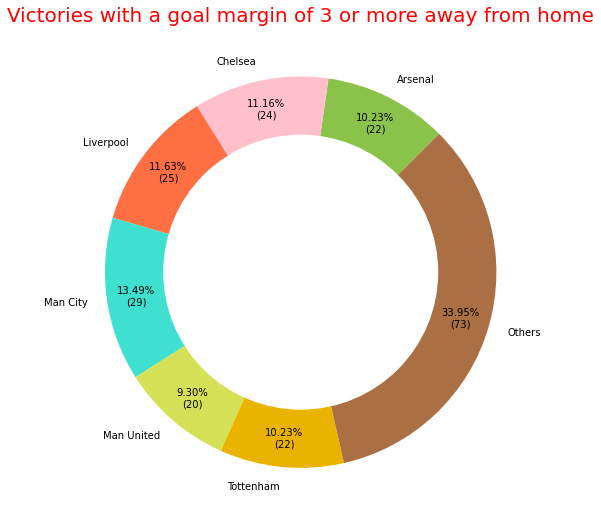

In [49]:
def value_and_percentage(x): 
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)


plt.figure(figsize=(9,9))
values = dominant_away_games['AwayTeam']
labels = dominant_away_games.index
total = np.sum(values)
colors = ['#8BC34A','Pink','#FE7043','Turquoise','#D4E157','#EAB300','#AA7043']
plt.pie (values , labels= labels , colors= colors , 
         startangle=45 , autopct=value_and_percentage, pctdistance=0.85)
my_circle=plt.Circle( (0,0), 0.7, color='white') # Adding circle at the centre
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Victories with a goal margin of 3 or more away from home',fontsize=20, color='red')
plt.show()

## <font color=blue>14. Find the total points collected by each team per season.<br>$\;\;\;\;$ Extract the points table of the teams who played all 10 seasons.<br>$\;\;\;\;$ Plot it as a line graph.<font/>

#### <font color=violet>We group the full time results (H, A and D) by Season and Home/Away Team.<font/>

In [50]:
season_home_wins = pd.DataFrame( decade_data_by_seasons[decade_data_by_seasons['FT_Result'] == 'H']
                                .groupby([decade_data_by_seasons.Season, decade_data_by_seasons.HomeTeam]).agg('count')
                                .unstack().fillna(0).stack()['FT_Result']).reset_index()

season_home_wins.columns = ['Season', 'Team', 'H_Wins']


season_away_wins = pd.DataFrame( decade_data_by_seasons[decade_data_by_seasons['FT_Result'] == 'A']
                                .groupby([decade_data_by_seasons.Season, decade_data_by_seasons.AwayTeam]).agg('count')
                                .unstack().fillna(0).stack()['FT_Result']).reset_index()

season_away_wins.columns = ['Season', 'Team', 'A_Wins']


season_home_draws = pd.DataFrame( decade_data_by_seasons[decade_data_by_seasons['FT_Result'] == 'D']
                                 .groupby([decade_data_by_seasons.Season, decade_data_by_seasons.HomeTeam]).agg('count')
                                 .unstack().fillna(0).stack()['FT_Result']).reset_index()

season_home_draws.columns = ['Season', 'Team', 'H_Draws']


season_away_draws = pd.DataFrame( decade_data_by_seasons[decade_data_by_seasons['FT_Result'] == 'D']
                                 .groupby([decade_data_by_seasons.Season, decade_data_by_seasons.AwayTeam]).agg('count')
                                 .unstack().fillna(0).stack()['FT_Result']).reset_index()

season_away_draws.columns = ['Season', 'Team', 'A_Draws']

#### <font color=violet>We add the wins of every team (home and away) and multiply it by 3. To this, we add the number of draws to get the total points.<font/>

In [51]:
season_points_per_team = pd.DataFrame(season_home_wins['Team'])

season_points_per_team = pd.concat([season_points_per_team, pd.DataFrame(season_home_wins.H_Wins), 
                                    pd.DataFrame(season_away_wins.A_Wins), pd.DataFrame(season_home_draws.H_Draws), 
                                    pd.DataFrame(season_away_draws.A_Draws)], axis=1)

season_points_per_team = season_points_per_team.set_index(season_home_wins.Season)


season_points_per_team['Points'] = 3 * (season_points_per_team.H_Wins + 
                                        season_points_per_team.A_Wins) + (season_points_per_team.H_Draws + 
                                                                          season_points_per_team.A_Draws)

season_points_per_team = season_points_per_team[season_points_per_team.Points != 0]
#season_points_per_team
season_points_per_team.head()

,Team,H_Wins,A_Wins,H_Draws,A_Draws,Points
Season,,,,,,
09-10,Arsenal,15.0,8.0,2.0,4.0,75.0
09-10,Aston Villa,8.0,9.0,8.0,5.0,64.0
09-10,Birmingham,8.0,5.0,9.0,2.0,50.0
09-10,Blackburn,10.0,3.0,6.0,5.0,50.0
09-10,Bolton,6.0,4.0,6.0,3.0,39.0


#### <font color=violet>To extract the points table of the teams who played all 10 seasons,<br>we match the Team column in season_points_per_team with the index of ten_season_teams.<font/>

In [52]:
ten_season_teams_points = season_points_per_team[season_points_per_team['Team'].isin(ten_season_teams.index)][['Team','Points']]
ten_season_teams_points = ten_season_teams_points.reset_index()
#ten_season_teams_points
ten_season_teams_points.head()

,Season,Team,Points
0,09-10,Arsenal,75.0
1,09-10,Chelsea,86.0
2,09-10,Everton,61.0
3,09-10,Liverpool,63.0
4,09-10,Man City,67.0


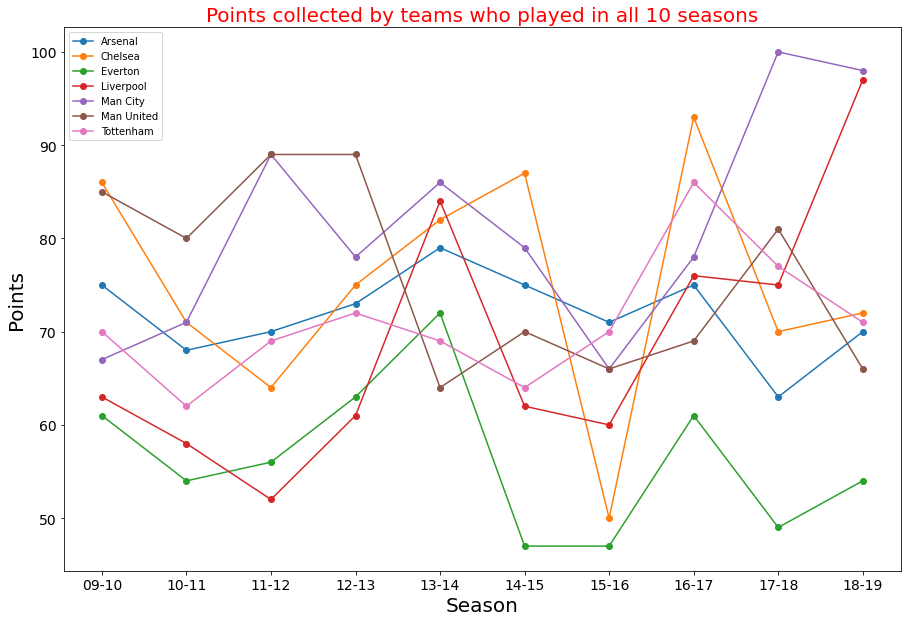

In [53]:
for club in ten_season_teams_points.Team.unique() :
    plt.plot(ten_season_teams_points[ten_season_teams_points['Team'] == club]['Season'], 
             ten_season_teams_points[ten_season_teams_points['Team'] == club]['Points'],  
             marker='o', label=club)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.xlabel('Season', fontsize = 20)
plt.ylabel('Points', fontsize = 20)
plt.title('Points collected by teams who played in all 10 seasons',fontsize=20, color='red')
plt.show()

## <font color=blue>15. Find the total shots on goal (shots and shots on target seperately) made by each team.<br>$\;\;\;\;$ Present the result as a dataframe.<br>$\;\;\;\;$ Also find the average shots on goal in home and away games.<br>$\;\;\;\;$ Merge this dataframe with the dataframe containing goals stats.<font/>

#### <font color=violet>We group the shots and shots on target (Home and Away) by Team (Home/Away).<font/>

In [54]:
each_team_home_shots = decade_data_by_seasons['H_Shots'].groupby(decade_data_by_seasons['HomeTeam']).sum()

each_team_away_shots = decade_data_by_seasons['A_Shots'].groupby(decade_data_by_seasons['AwayTeam']).sum()

each_team_home_shots_target = decade_data_by_seasons['H_Shots_Target'].groupby(decade_data_by_seasons['HomeTeam']).sum()

each_team_away_shots_target = decade_data_by_seasons['A_Shots_Target'].groupby(decade_data_by_seasons['AwayTeam']).sum()


each_team_shot_stats = pd.DataFrame(index = each_team_games.index)
each_team_shot_stats = pd.concat([each_team_games, pd.DataFrame(each_team_home_shots), pd.DataFrame(each_team_away_shots), 
                                  pd.DataFrame(each_team_home_shots + each_team_away_shots), 
                                  pd.DataFrame(each_team_home_shots_target), pd.DataFrame(each_team_away_shots_target), 
                                  pd.DataFrame(each_team_home_shots_target + each_team_away_shots_target)], axis=1)

each_team_shot_stats.columns = ['Total Games', 'HomeShots', 'AwayShots', 'TotalShots', 
                               'HomeShotsTarget', 'AwayShotsTarget', 'TotalShotsTarget']

each_team_shot_stats['AvgShots_homeGame'] = (each_team_shot_stats['HomeShots']/(each_team_shot_stats['Total Games']/2)).round(2)
each_team_shot_stats['AvgShots_awayGame'] = (each_team_shot_stats['AwayShots']/(each_team_shot_stats['Total Games']/2)).round(2)

each_team_shot_stats['AvgShotstarget_homeGame'] = (each_team_shot_stats['HomeShotsTarget']/
                                                   (each_team_shot_stats['Total Games']/2)).round(2)
each_team_shot_stats['AvgShotstarget_awayGame'] = (each_team_shot_stats['AwayShotsTarget']/
                                                   (each_team_shot_stats['Total Games']/2)).round(2)


#### <font color=violet>Merging with the dataframe containing goal stats.<font/>

In [55]:
each_team_shot_and_goals = pd.concat([each_team_shot_stats, each_team_goal_stats], axis=1)
each_team_shot_and_goals = each_team_shot_and_goals.loc[:,~each_team_shot_and_goals.columns.duplicated()]

#reorder columns
each_team_shot_and_goals = each_team_shot_and_goals[['Total Games', 'HomeShots', 'HomeShotsTarget','HomeGoals',
                                                     'AwayShots', 'AwayShotsTarget', 'AwayGoals', 
                                                     'TotalShots', 'TotalShotsTarget', 'TotalGoals', 
                                                     'AvgShots_homeGame', 'AvgShotstarget_homeGame', 'AvgGoals_homeGame', 
                                                    'AvgShots_awayGame', 'AvgShotstarget_awayGame', 'AvgGoals_awayGame']]

#rename columns to fit
each_team_shot_and_goals.columns = ['Games', 'HS', 'HST', 'HG','AS', 'AST', 'AG', 
                                    'TS', 'TST', 'TG', 
                                    'AvgSHG', 'AvgSTHG', 'AvgGHG', 'AvgSAG', 'AvgSTAG', 'AvgGAG']

each_team_shot_and_goals

,Games,HS,HST,HG,AS,AST,AG,TS,TST,TG,AvgSHG,AvgSTHG,AvgGHG,AvgSAG,AvgSTAG,AvgGAG
Arsenal,380,3144,1465,410,2474,1136,319,5618,2601,729,16.55,7.71,2.16,13.02,5.98,1.68
Aston Villa,266,1560,680,152,1314,600,129,2874,1280,281,11.73,5.11,1.14,9.88,4.51,0.97
Birmingham,76,379,186,38,321,189,37,700,375,75,9.97,4.89,1.00,8.45,4.97,0.97
Blackburn,114,738,389,76,496,278,59,1234,667,135,12.95,6.82,1.33,8.70,4.88,1.04
Blackpool,38,253,134,30,193,101,25,446,235,55,13.32,7.05,1.58,10.16,5.32,1.32
Bolton,114,770,462,83,635,334,57,1405,796,140,13.51,8.11,1.46,11.14,5.86,1.00
Bournemouth,152,992,338,114,831,287,87,1823,625,201,13.05,4.45,1.50,10.93,3.78,1.14
Brighton,76,417,124,43,331,102,26,748,226,69,10.97,3.26,1.13,8.71,2.68,0.68
Burnley,190,1075,383,105,888,332,85,1963,715,190,11.32,4.03,1.11,9.35,3.49,0.89
Cardiff,76,458,142,41,378,110,25,836,252,66,12.05,3.74,1.08,9.95,2.89,0.66


## <font color=blue>16. Extract the shots and goals stats of the teams who played all 10 seasons.<br>$\;\;\;\;$ Make bar plots for the following.<br>$\;\;\;\;$ a) TotalGoals, TotalShotsOnTarget, TotalShots. <br>$\;\;\;\;$ b) AvgGoals/Game@Home, AvgShotsOnTarget/Game@Home, AvgShots/Game@Home.<br>$\;\;\;\;$ c) AvgGoals/Game@Away, AvgShotsOnTarget/Game@Away, AvgShots/Game@Away.<font/>

#### <font color=violet>To extract the points table of the teams who played all 10 seasons,<br>we match the index of each_team_shot_and_goals with the index of ten_season_teams.<font/>

In [56]:
ten_season_teams_shots_and_goals = each_team_shot_and_goals[each_team_shot_and_goals.index.isin(ten_season_teams.index)]
ten_season_teams_shots_and_goals

,Games,HS,HST,HG,AS,AST,AG,TS,TST,TG,AvgSHG,AvgSTHG,AvgGHG,AvgSAG,AvgSTAG,AvgGAG
Arsenal,380,3144,1465,410,2474,1136,319,5618,2601,729,16.55,7.71,2.16,13.02,5.98,1.68
Chelsea,380,3376,1505,424,2715,1130,301,6091,2635,725,17.77,7.92,2.23,14.29,5.95,1.58
Everton,380,2761,1198,327,2182,988,217,4943,2186,544,14.53,6.31,1.72,11.48,5.20,1.14
Liverpool,380,3387,1449,398,2609,1173,307,5996,2622,705,17.83,7.63,2.09,13.73,6.17,1.62
Man City,380,3313,1466,480,2818,1227,349,6131,2693,829,17.44,7.72,2.53,14.83,6.46,1.84
Man United,380,3032,1388,392,2323,1053,309,5355,2441,701,15.96,7.31,2.06,12.23,5.54,1.63
Tottenham,380,3366,1526,355,2639,1171,308,6005,2697,663,17.72,8.03,1.87,13.89,6.16,1.62


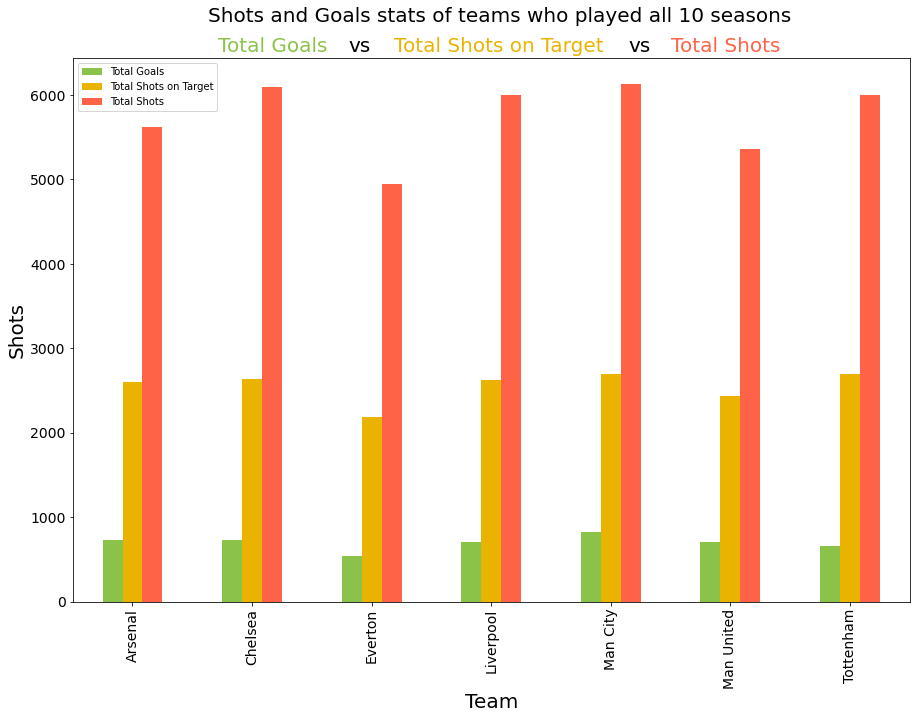

In [57]:
ten_season_teams_shots_and_goals.plot(y=['TG', 'TST','TS'], kind='bar', 
                                      label=['Total Goals', 'Total Shots on Target', 'Total Shots'], 
                                      color=['#8BC34A','#EAB300','tomato'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Team', fontsize = 20)
plt.ylabel('Shots', fontsize = 20)

plt.figtext(0.25, 0.93, "Shots and Goals stats of teams who played all 10 seasons", 
            fontsize=20, color='Black')

plt.figtext(0.26, 0.91, "Total Goals", fontsize=20, color='#8BC34A', ha ='left', va='top')
plt.figtext(0.38, 0.91, "vs", fontsize=20, color='Black', ha ='left', va='top')
plt.figtext(0.52, 0.91, "Total Shots on Target", fontsize=20, color='#EAB300', ha ='center', va='top')
plt.figtext(0.65, 0.91, "vs", fontsize=20, color='Black', ha ='center', va='top')
plt.figtext(0.78, 0.91, "Total Shots", fontsize=20, color='tomato', ha ='right', va='top')

plt.show()

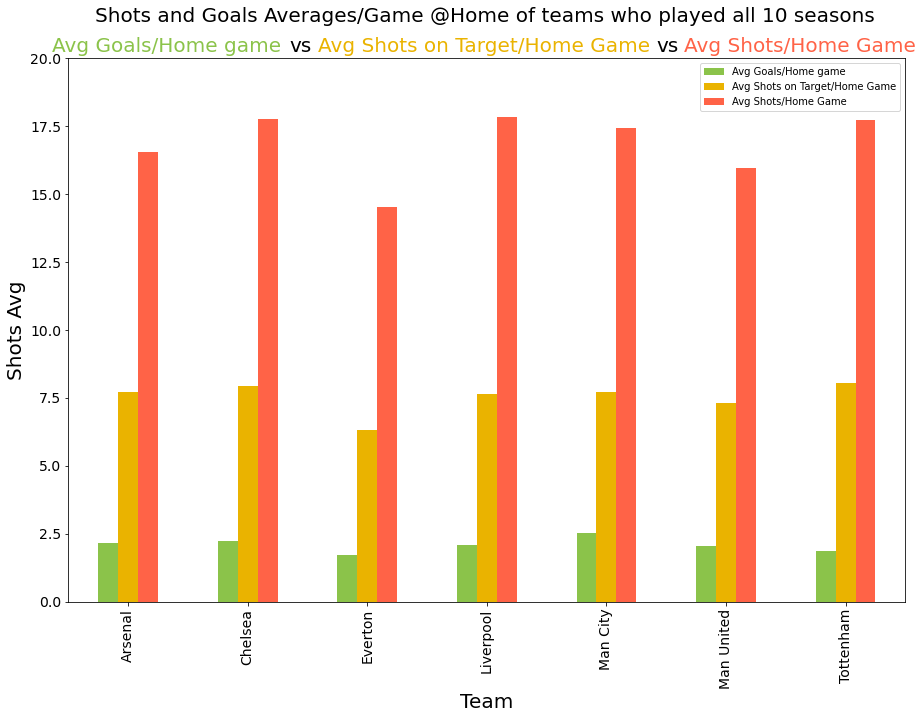

In [58]:
ten_season_teams_shots_and_goals.plot(y=['AvgGHG', 'AvgSTHG','AvgSHG'], kind='bar', 
                                      label=['Avg Goals/Home game', 'Avg Shots on Target/Home Game', 'Avg Shots/Home Game'], 
                                      color=['#8BC34A','#EAB300','tomato'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Team', fontsize = 20)
plt.ylabel('Shots Avg', fontsize = 20)
plt.ylim(0, 20)

plt.figtext(0.15, 0.93, "Shots and Goals Averages/Game @Home of teams who played all 10 seasons", 
            fontsize=20, color='Black')

plt.figtext(0.11, 0.91, "Avg Goals/Home game", fontsize=20, color='#8BC34A', ha ='left', va='top')
plt.figtext(0.33, 0.91, "vs", fontsize=20, color='Black', ha ='left', va='top')
plt.figtext(0.51, 0.91, "Avg Shots on Target/Home Game", fontsize=20, color='#EAB300', ha ='center', va='top')
plt.figtext(0.68, 0.91, "vs", fontsize=20, color='Black', ha ='center', va='top')
plt.figtext(0.91, 0.91, "Avg Shots/Home Game", fontsize=20, color='tomato', ha ='right', va='top')

plt.show()

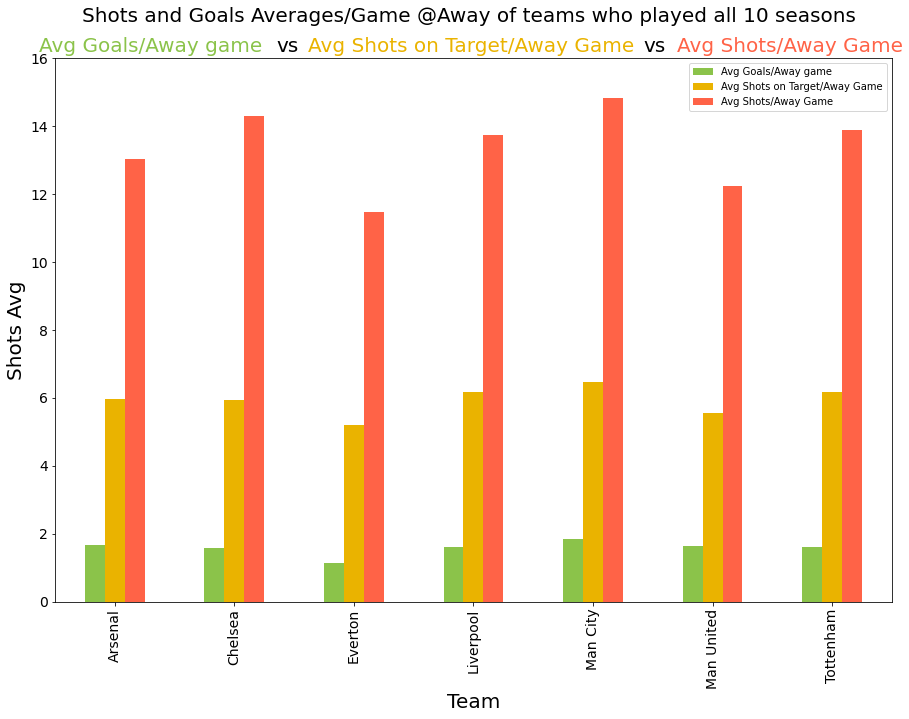

In [59]:
ten_season_teams_shots_and_goals.plot(y=['AvgGAG', 'AvgSTAG','AvgSAG'], kind='bar', 
                                      label=['Avg Goals/Away game', 'Avg Shots on Target/Away Game', 'Avg Shots/Away Game'], 
                                      color=['#8BC34A','#EAB300','tomato'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Team', fontsize = 20)
plt.ylabel('Shots Avg', fontsize = 20)
plt.ylim(0, 16)

plt.figtext(0.15, 0.93, "Shots and Goals Averages/Game @Away of teams who played all 10 seasons", 
            fontsize=20, color='Black')

plt.figtext(0.11, 0.91, "Avg Goals/Away game", fontsize=20, color='#8BC34A', ha ='left', va='top')
plt.figtext(0.33, 0.91, "vs", fontsize=20, color='Black', ha ='left', va='top')
plt.figtext(0.51, 0.91, "Avg Shots on Target/Away Game", fontsize=20, color='#EAB300', ha ='center', va='top')
plt.figtext(0.68, 0.91, "vs", fontsize=20, color='Black', ha ='center', va='top')
plt.figtext(0.91, 0.91, "Avg Shots/Away Game", fontsize=20, color='tomato', ha ='right', va='top')

plt.show()

## <font color=blue>17. Find the converison rates (goals/shots) for the teams which played all 10 seasons.<br>$\;\;\;\;$ Present the result as a bar plot.<font/>

#### <font color=violet>We add two more columns into ten_season_teams_shots_and_goals named 'CRH%' and 'CRA%'.<font/>

In [60]:
#CRH - coversion rate @ Home
#CRA - convertio rate @ Away

#two diff methods to divide columns
ten_season_teams_shots_and_goals['CRH%'] = (ten_season_teams_shots_and_goals['HG']/
                                           ten_season_teams_shots_and_goals['HS']*100).round(2)

ten_season_teams_shots_and_goals.loc[:,'CRA%'] = (ten_season_teams_shots_and_goals.loc[:,'AG']/
                                                 ten_season_teams_shots_and_goals.loc[:,'AS']*100).round(2)

ten_season_teams_shots_and_goals

,Games,HS,HST,HG,AS,AST,AG,TS,TST,TG,AvgSHG,AvgSTHG,AvgGHG,AvgSAG,AvgSTAG,AvgGAG,CRH%,CRA%
Arsenal,380,3144,1465,410,2474,1136,319,5618,2601,729,16.55,7.71,2.16,13.02,5.98,1.68,13.04,12.89
Chelsea,380,3376,1505,424,2715,1130,301,6091,2635,725,17.77,7.92,2.23,14.29,5.95,1.58,12.56,11.09
Everton,380,2761,1198,327,2182,988,217,4943,2186,544,14.53,6.31,1.72,11.48,5.20,1.14,11.84,9.95
Liverpool,380,3387,1449,398,2609,1173,307,5996,2622,705,17.83,7.63,2.09,13.73,6.17,1.62,11.75,11.77
Man City,380,3313,1466,480,2818,1227,349,6131,2693,829,17.44,7.72,2.53,14.83,6.46,1.84,14.49,12.38
Man United,380,3032,1388,392,2323,1053,309,5355,2441,701,15.96,7.31,2.06,12.23,5.54,1.63,12.93,13.30
Tottenham,380,3366,1526,355,2639,1171,308,6005,2697,663,17.72,8.03,1.87,13.89,6.16,1.62,10.55,11.67


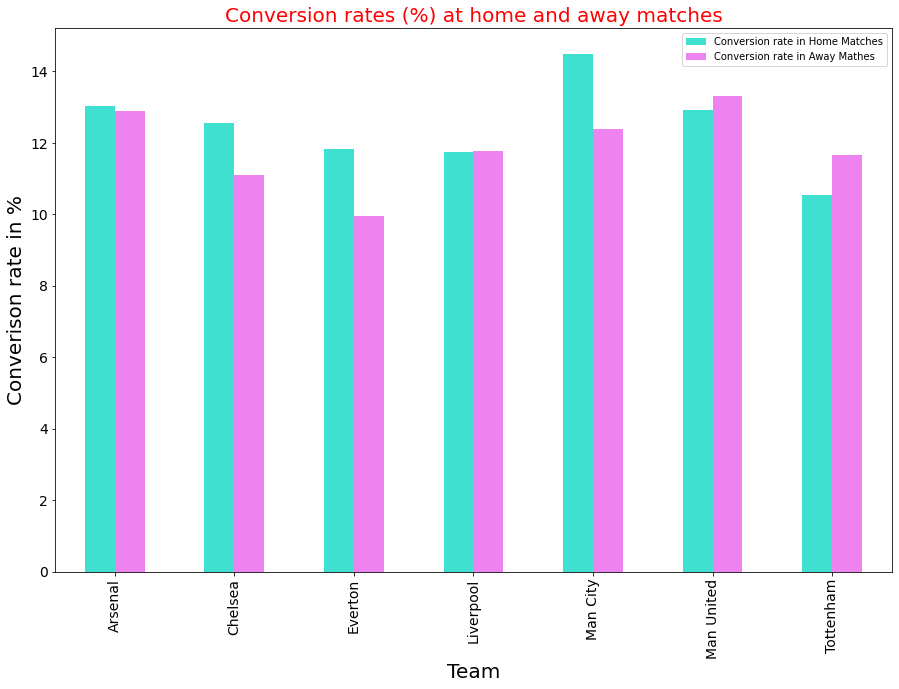

In [61]:
ten_season_teams_shots_and_goals.plot(y=['CRH%', 'CRA%'], kind='bar', 
                                      label=['Conversion rate in Home Matches', 'Conversion rate in Away Mathes'], 
                                      color=['Turquoise','Violet'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Team', fontsize = 20)
plt.ylabel('Converison rate in %', fontsize = 20)

plt.title('Conversion rates (%) at home and away matches', fontsize = 20, color='red')

plt.show()

## <font color=blue>18. Find the average goals conceded @home and @away for all the teams.<br>$\;\;\;\;$ Present the result as a bar plot.<font/>

#### <font color=violet>We find out the total goals conceded by each team at home (goals scored by away team) and away (goals scored by home team) and add them.<br>To find average goals conceded per game at home and away, divide goals conceded at home and away by half of total games.<font/>

In [62]:
each_team_home_goals_conceded = decade_data_by_seasons['FT_Away_Goal'].groupby(decade_data_by_seasons['HomeTeam']).sum()

each_team_away_goals_conceded = decade_data_by_seasons['FT_Home_Goal'].groupby(decade_data_by_seasons['AwayTeam']).sum()

each_team_goal_conceded_stats = pd.DataFrame(index = each_team_games.index)
each_team_goal_conceded_stats = pd.concat([each_team_games, pd.DataFrame(each_team_home_goals_conceded), 
                                           pd.DataFrame(each_team_away_goals_conceded), 
                                           pd.DataFrame(each_team_home_goals_conceded + each_team_away_goals_conceded) ], 
                                          axis=1)

each_team_goal_conceded_stats.columns = ['Total Games', 'GoalsConcededHome', 'GoalsConcededAway', 'TotalGoalsConceded']

each_team_goal_conceded_stats['AvgGoalsConceded_homeGame'] = (each_team_goal_conceded_stats['GoalsConcededHome']/
                                                              (each_team_goal_conceded_stats['Total Games']/2)).round(2)

each_team_goal_conceded_stats['AvgGoalsConceded_awayGame'] = (each_team_goal_conceded_stats['GoalsConcededAway']/
                                                              (each_team_goal_conceded_stats['Total Games']/2)).round(2)

each_team_goal_conceded_stats

,Total Games,GoalsConcededHome,GoalsConcededAway,TotalGoalsConceded,AvgGoalsConceded_homeGame,AvgGoalsConceded_awayGame
Arsenal,380,158,271,429,0.83,1.43
Aston Villa,266,177,237,414,1.33,1.78
Birmingham,76,35,70,105,0.92,1.84
Blackburn,114,67,125,192,1.18,2.19
Blackpool,38,37,41,78,1.95,2.16
Bolton,114,94,106,200,1.65,1.86
Bournemouth,152,118,147,265,1.55,1.93
Brighton,76,53,61,114,1.39,1.61
Burnley,190,120,177,297,1.26,1.86
Cardiff,76,73,70,143,1.92,1.84


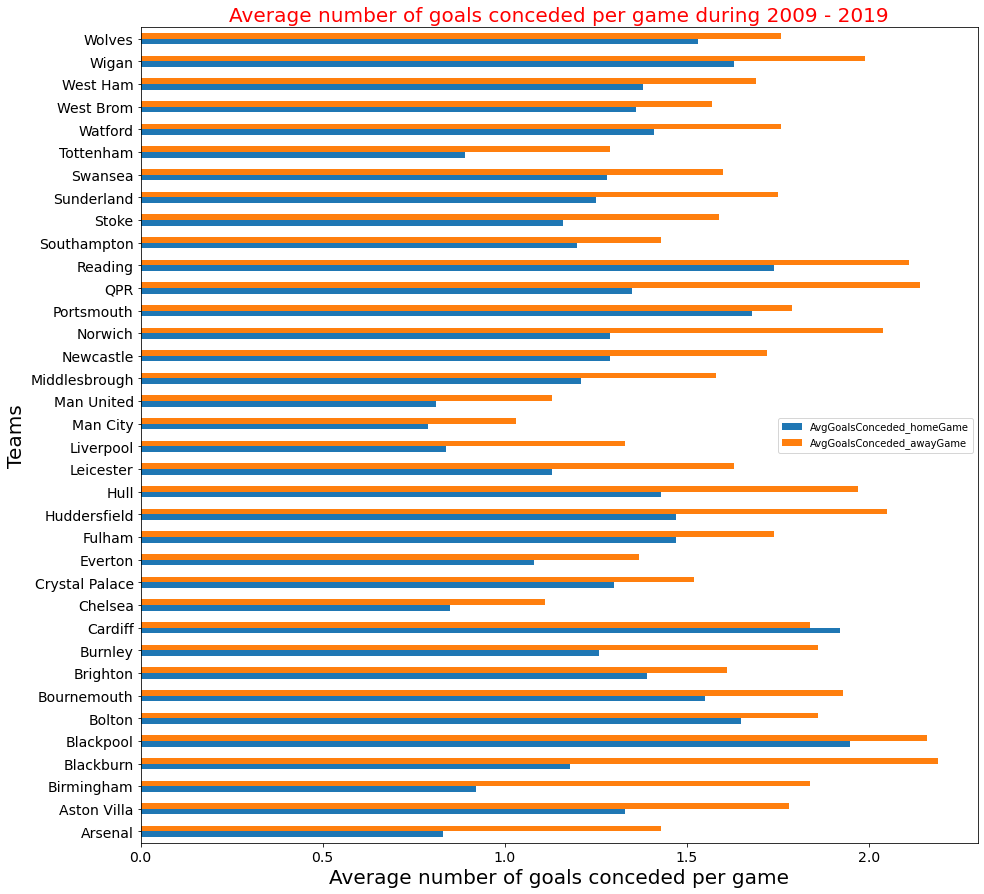

In [63]:
each_team_goal_conceded_stats.plot(y=["AvgGoalsConceded_homeGame", "AvgGoalsConceded_awayGame"], 
                                   kind="barh", legend=True, figsize=(15,15))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Teams',fontsize=20)
plt.xlabel('Average number of goals conceded per game',fontsize=20)
plt.title('Average number of goals conceded per game during 2009 - 2019',fontsize=20, color='red') 
plt.show()

## <font color=blue>19. Find the total yellow and red cards given to home and away teams.<br>$\;\;\;\;$ Present the result as a donut plot.<font/>

#### <font color=violet>We find out the sum of yellow and red cards awarded to home and away sides.<font/>

In [64]:
total_yellows_home = decade_data_by_seasons['H_Yellow'].sum()
total_reds_home = decade_data_by_seasons['H_Red'].sum()
total_yellows_away = decade_data_by_seasons['A_Yellow'].sum()
total_reds_away = decade_data_by_seasons['A_Red'].sum()

yellow_and_red_cards = [total_yellows_home, total_reds_home, total_yellows_away, total_reds_away]

print('Total yellow cards awarded to home side : ' + str(yellow_and_red_cards[0]))
print('Total red cards awarded to home side : ' + str(yellow_and_red_cards[1]))
print('Total yellow cards awarded to away side : ' + str(yellow_and_red_cards[2]))
print('Total red cards awarded to away side : ' + str(yellow_and_red_cards[3]))

Total yellow cards awarded to home side : 5618
Total red cards awarded to home side : 226
Total yellow cards awarded to away side : 6731
Total red cards awarded to away side : 331


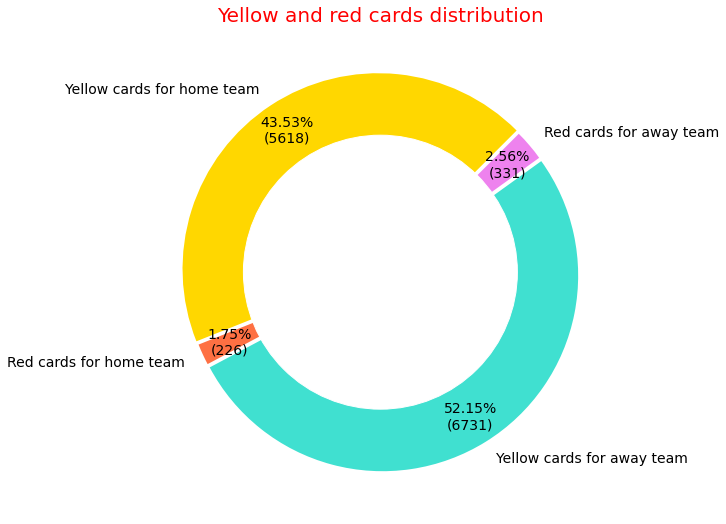

In [65]:
def value_and_percentage(x): 
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)


plt.figure(figsize=(9,9))
values = yellow_and_red_cards
labels = ['Yellow cards for home team', 'Red cards for home team', 'Yellow cards for away team', 'Red cards for away team']
total = np.sum(values)
colors = ['Gold','#FE7043','Turquoise','Violet']
plt.pie (values , labels= labels , colors= colors , 
         startangle=45 , autopct=value_and_percentage, pctdistance=0.85, 
         textprops={'fontsize': 14}, explode=[0.02,0,0.02,0] )

my_circle=plt.Circle( (0,0), 0.7, color='white') # Adding circle at the centre
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Yellow and red cards distribution',fontsize=20, color='red')
plt.show()

## <font color=blue>20. Find the total yellow and red cards given to each team home and away.<br>$\;\;\;\;$ Plot the result (home and away combined, reds and yellows seperated) as a bar plot.<br>$\;\;\;\;$ Plot the average red and yellow cards per game at home and away as a bar plot.<font/>

#### <font color=violet>We find out the total cards (yellow and red seperate) received by each team in home and away games and add them.<br>To find average cards received per game at home and away, divide the cards received at home and away by half of total games.<font/>

In [66]:
each_team_home_yellows = decade_data_by_seasons['H_Yellow'].groupby(decade_data_by_seasons['HomeTeam']).sum()
each_team_home_reds = decade_data_by_seasons['H_Red'].groupby(decade_data_by_seasons['HomeTeam']).sum()

each_team_away_yellows = decade_data_by_seasons['A_Yellow'].groupby(decade_data_by_seasons['AwayTeam']).sum()
each_team_away_reds = decade_data_by_seasons['A_Red'].groupby(decade_data_by_seasons['AwayTeam']).sum()


each_team_card_stats = pd.DataFrame(index = each_team_games.index)
each_team_card_stats = pd.concat([each_team_games, pd.DataFrame(each_team_home_yellows), pd.DataFrame(each_team_home_reds),
                                  pd.DataFrame(each_team_away_yellows), pd.DataFrame(each_team_away_reds), 
                                  pd.DataFrame(each_team_home_yellows + each_team_away_yellows), 
                                  pd.DataFrame(each_team_home_reds + each_team_away_reds)], axis=1)

each_team_card_stats.columns = ['Total Games', 'HomeYellows', 'HomeReds', 'AwayYellows', 
                                'AwayReds', 'TotalYellows', 'TotalReds']

#HGY - HomeGameYellow; HGR - HomeGameRed; AGY - AwayGameYellow; AGR - AwayGameRed
each_team_card_stats['AvgHGY'] = (each_team_card_stats['HomeYellows']/(each_team_card_stats['Total Games']/2)).round(2)
each_team_card_stats['AvgHGR'] = (each_team_card_stats['HomeReds']/(each_team_card_stats['Total Games']/2)).round(2)
each_team_card_stats['AvgAGY'] = (each_team_card_stats['AwayYellows']/(each_team_card_stats['Total Games']/2)).round(2)
each_team_card_stats['AvgAGR'] = (each_team_card_stats['AwayReds']/(each_team_card_stats['Total Games']/2)).round(2)

each_team_card_stats

,Total Games,HomeYellows,HomeReds,AwayYellows,AwayReds,TotalYellows,TotalReds,AvgHGY,AvgHGR,AvgAGY,AvgAGR
Arsenal,380,278,13,313,20,591,33,1.46,0.07,1.65,0.11
Aston Villa,266,213,11,286,8,499,19,1.60,0.08,2.15,0.06
Birmingham,76,60,3,71,1,131,4,1.58,0.08,1.87,0.03
Blackburn,114,91,3,101,8,192,11,1.60,0.05,1.77,0.14
Blackpool,38,22,0,25,2,47,2,1.16,0.00,1.32,0.11
Bolton,114,86,8,107,7,193,15,1.51,0.14,1.88,0.12
Bournemouth,152,116,3,102,3,218,6,1.53,0.04,1.34,0.04
Brighton,76,67,3,47,3,114,6,1.76,0.08,1.24,0.08
Burnley,190,148,0,178,7,326,7,1.56,0.00,1.87,0.07
Cardiff,76,58,0,56,2,114,2,1.53,0.00,1.47,0.05


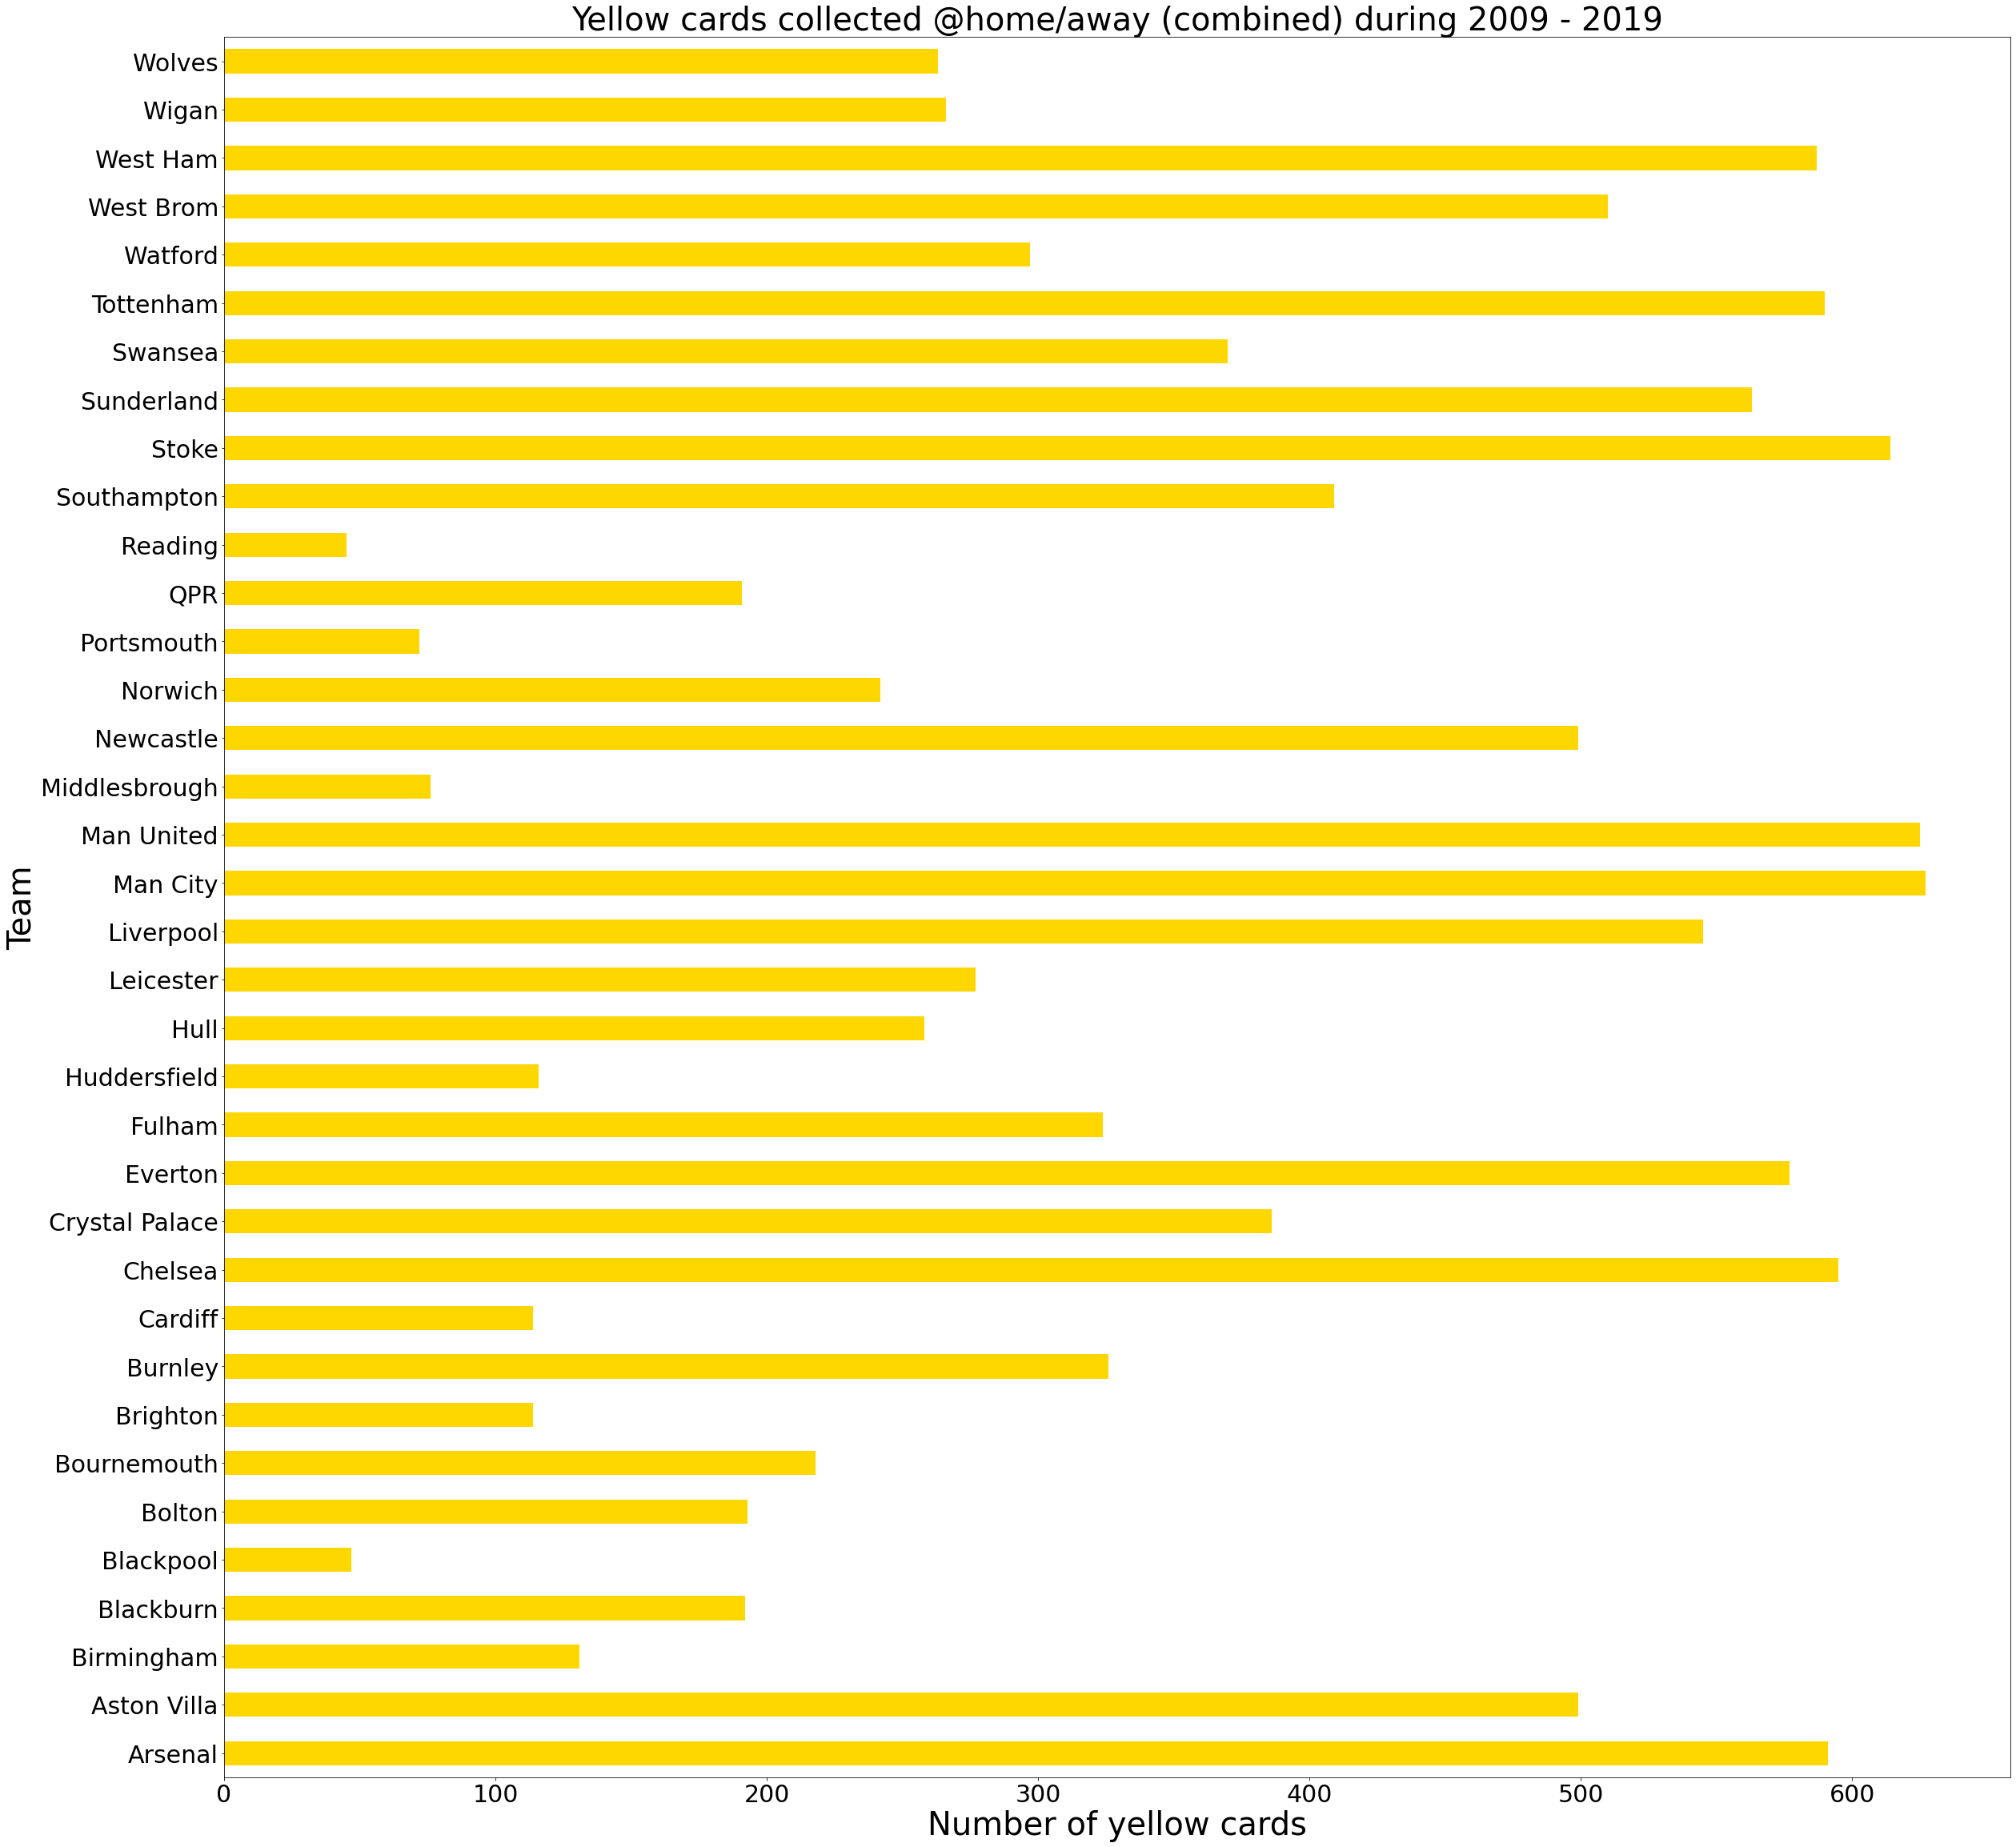

In [67]:
ax1 = each_team_card_stats.plot( y=["TotalYellows"], kind="barh",
                          legend=False, color =('gold'), figsize=(40,40),
                          title='Yellow cards collected @home/away (combined) during 2009 - 2019', fontsize=30)
ax1.set(xlabel='Number of yellow cards', ylabel='Team')
ax1.title.set_size(40)
ax1yaxis_label = ax1.yaxis.get_label()
ax1yaxis_label.set_fontsize(40)
ax1xaxis_label = ax1.xaxis.get_label()
ax1xaxis_label.set_fontsize(40)
plt.show()

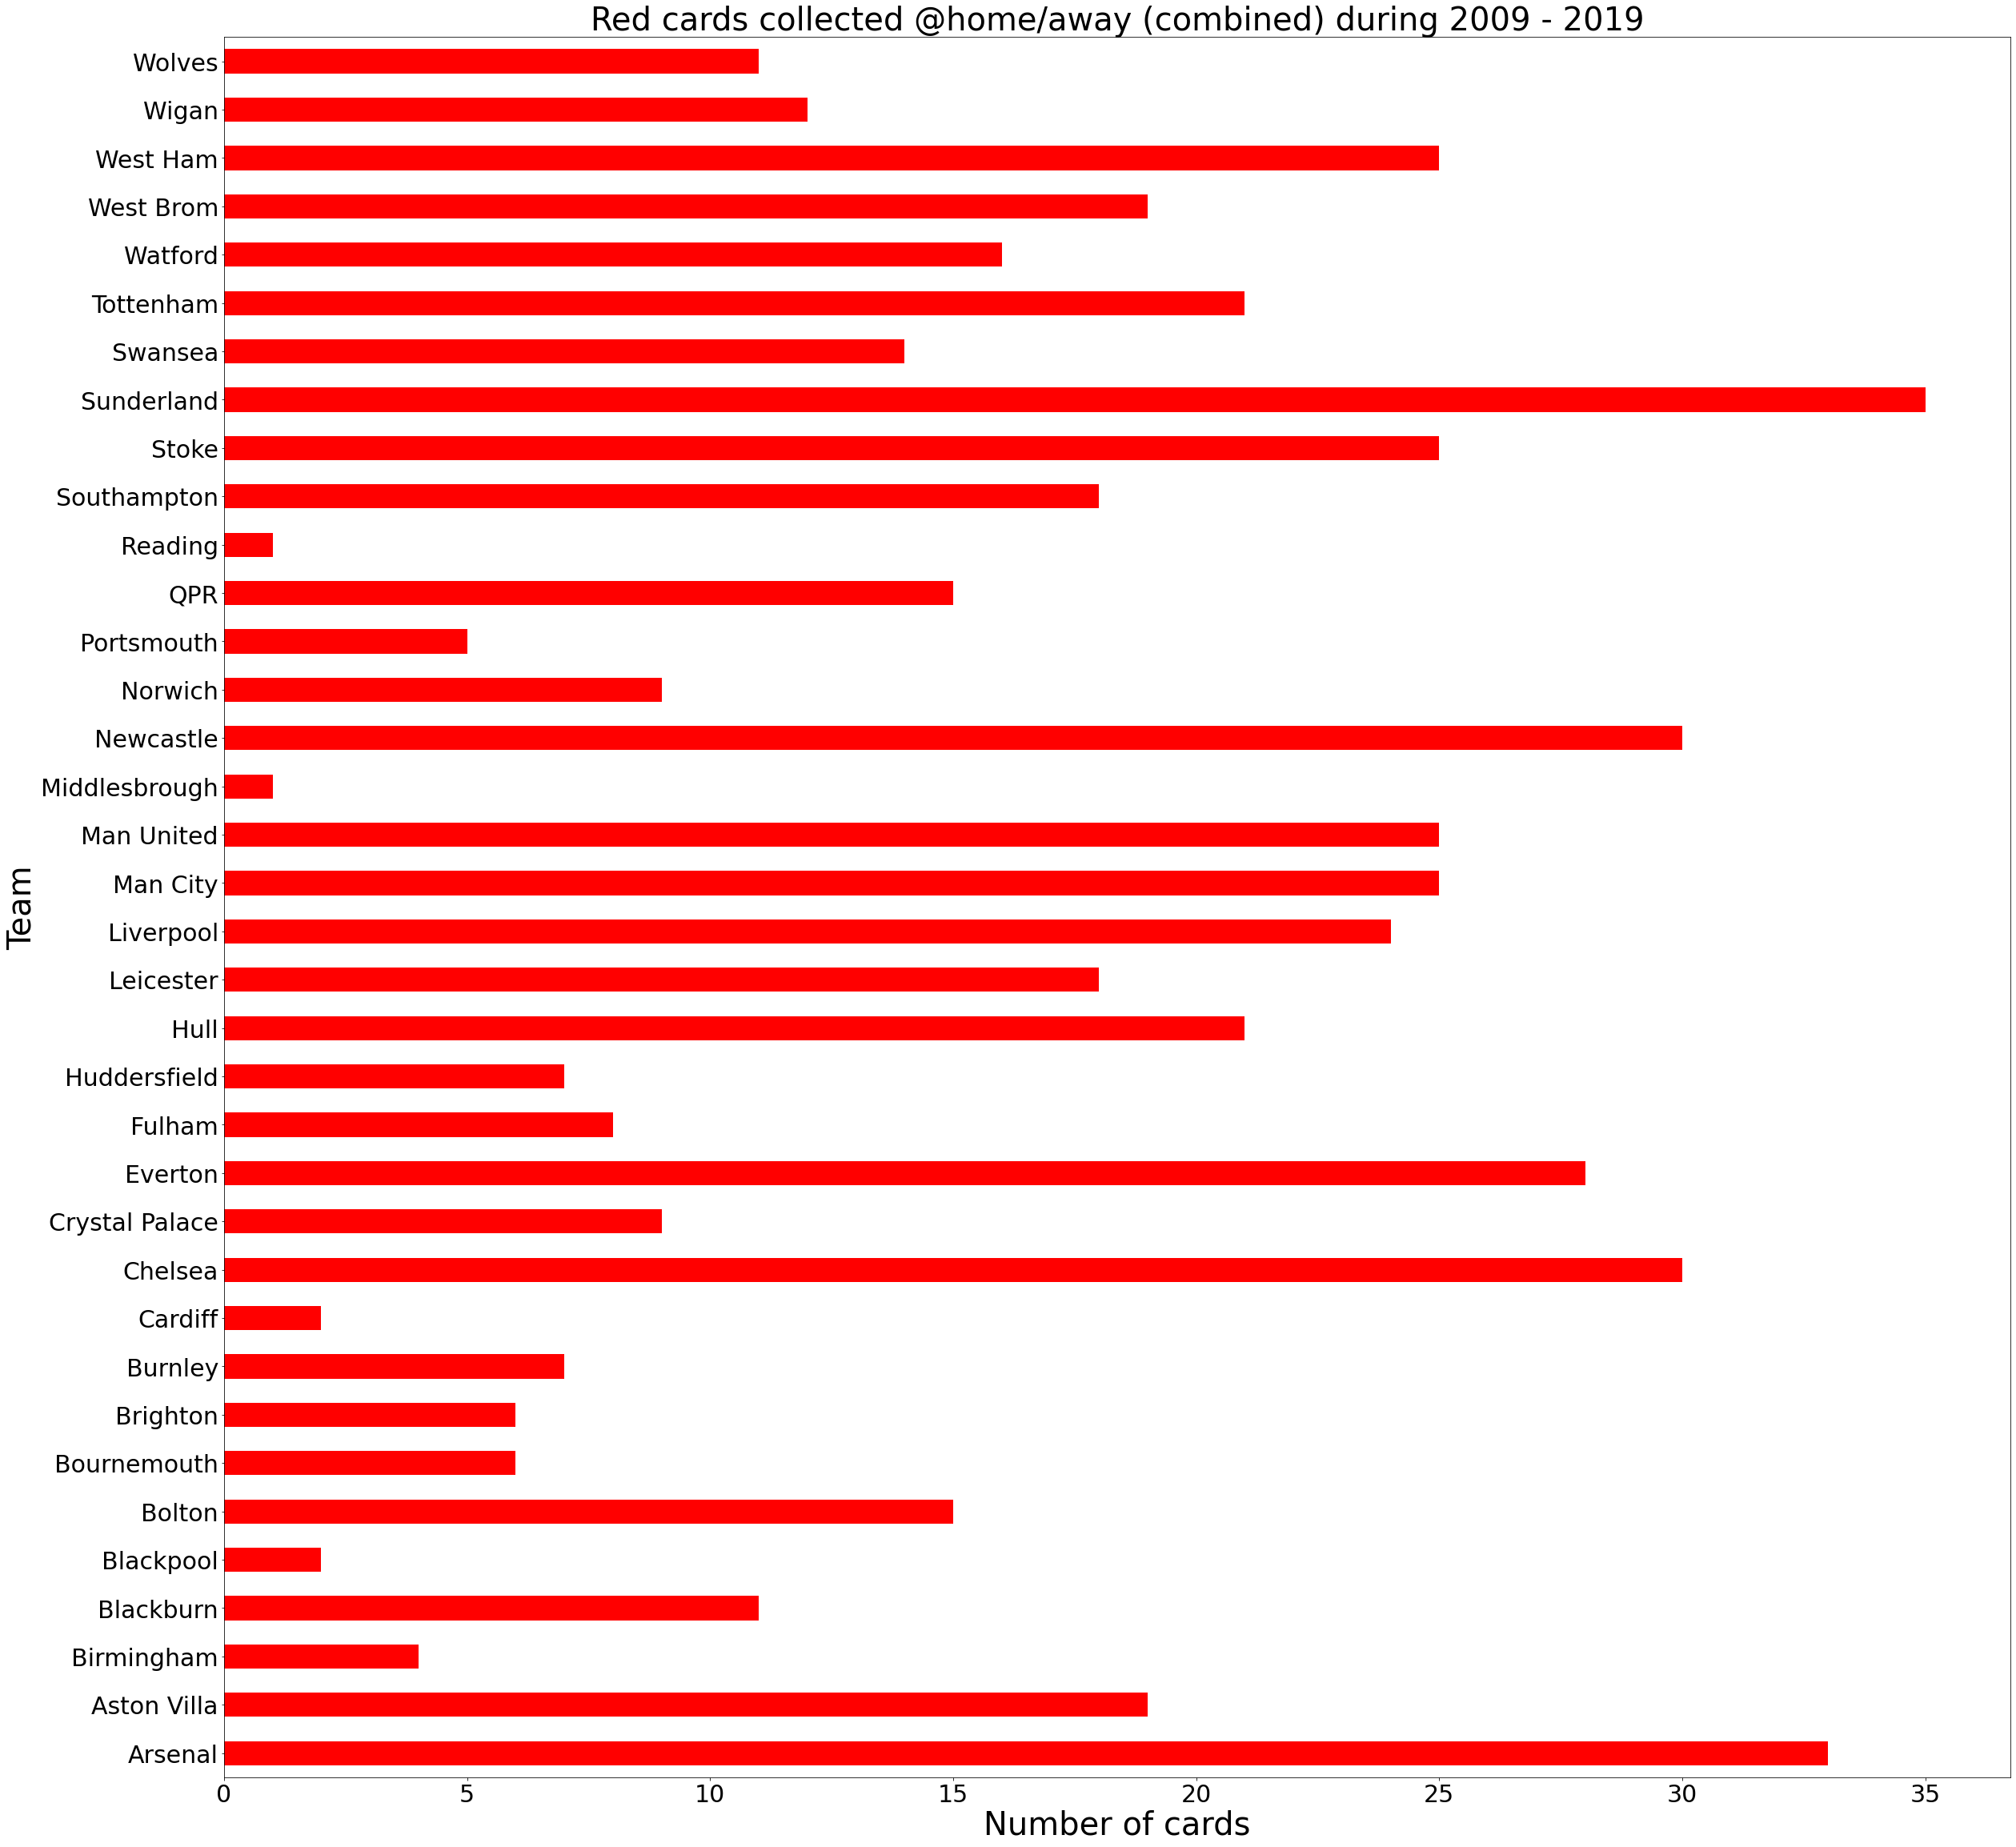

In [68]:
ax2 = each_team_card_stats.plot( y=["TotalReds"], kind="barh", 
                          legend=False, color =('red'), figsize=(40,40), 
                          title='Red cards collected @home/away (combined) during 2009 - 2019', fontsize=30)
ax2.set(xlabel='Number of cards', ylabel='Team')
ax2.title.set_size(40)
ax2yaxis_label = ax2.yaxis.get_label()
ax2yaxis_label.set_fontsize(40)
ax2xaxis_label = ax2.xaxis.get_label()
ax2xaxis_label.set_fontsize(40)

plt.show()

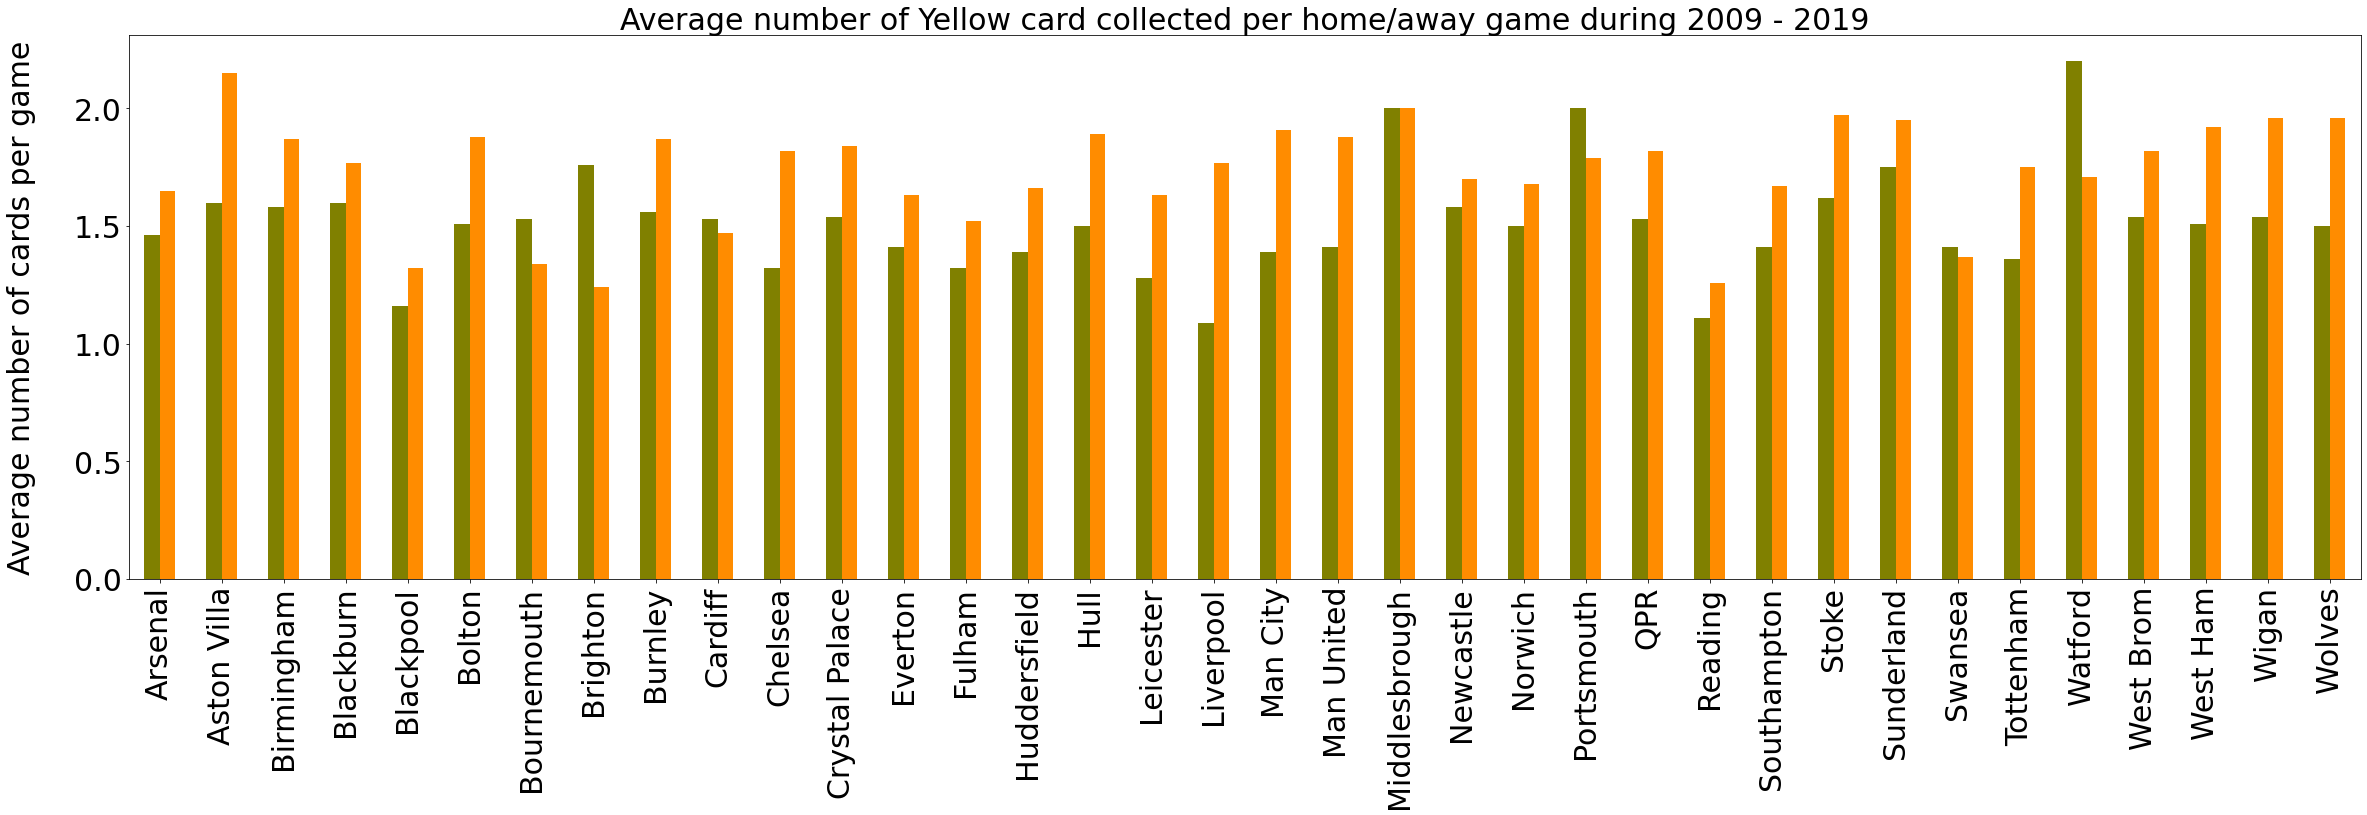

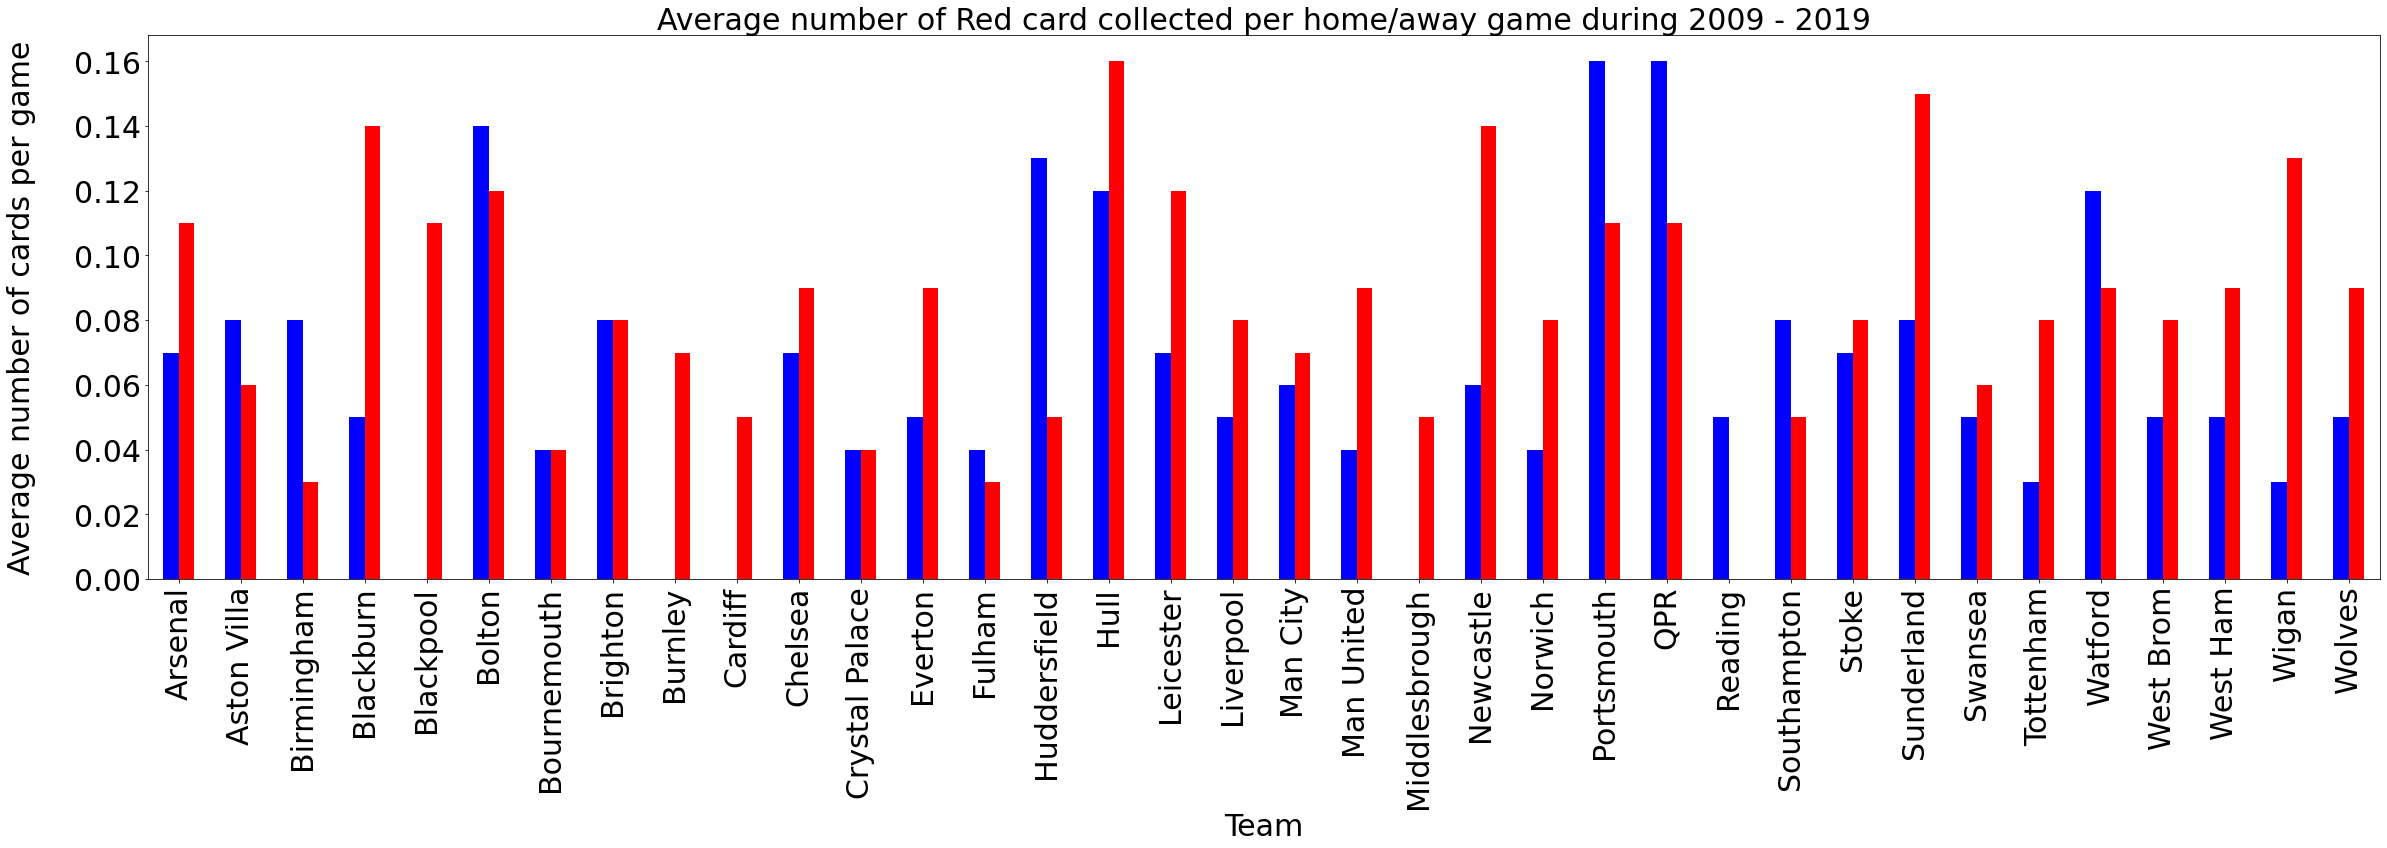

In [69]:
ax1 = each_team_card_stats.plot( y=["AvgHGY", "AvgAGY"], kind="bar",
                          legend=False, color =('olive','darkorange'), figsize=(40,10),
                          title='Average number of Yellow card collected per home/away game during 2009 - 2019', fontsize=30)
ax1.set(xlabel='', ylabel='Average number of cards per game\n') #we dont give x label here. Both plots will have same x axis.
ax1.title.set_size(30)
ax1yaxis_label = ax1.yaxis.get_label()
ax1yaxis_label.set_fontsize(30)

ax2 = each_team_card_stats.plot( y=["AvgHGR", "AvgAGR"], kind="bar", 
                          legend=False, color =('blue','red'), figsize=(40,10), 
                          title='Average number of Red card collected per home/away game during 2009 - 2019', fontsize=30)
ax2.set(xlabel='Team', ylabel='Average number of cards per game\n')
ax2.title.set_size(30)
ax2yaxis_label = ax2.yaxis.get_label()
ax2yaxis_label.set_fontsize(30)
ax2xaxis_label = ax2.xaxis.get_label()
ax2xaxis_label.set_fontsize(30)

plt.show()

## <font color=blue>21. Find the total number of yellow and red cards awarded by each referee.<br>$\;\;\;\;$ Plot the result as a bar plot.<font/>

#### <font color=violet>We find out the total cards (yellow and red seperate) awarded by each referee in home and away games and add them.<font/>

In [70]:
referee_home_yellows = decade_data_by_seasons['H_Yellow'].groupby(decade_data_by_seasons['Referee']).sum()
referee_home_reds = decade_data_by_seasons['H_Red'].groupby(decade_data_by_seasons['Referee']).sum()
referee_away_yellows = decade_data_by_seasons['A_Yellow'].groupby(decade_data_by_seasons['Referee']).sum()
referee_away_reds = decade_data_by_seasons['A_Red'].groupby(decade_data_by_seasons['Referee']).sum()

each_referee_card_stats = pd.DataFrame(index = all_referees.index)
each_referee_card_stats = pd.concat([all_referees, pd.DataFrame(referee_home_yellows), pd.DataFrame(referee_home_reds),
                                  pd.DataFrame(referee_away_yellows), pd.DataFrame(referee_away_reds), 
                                  pd.DataFrame(referee_home_yellows + referee_away_yellows), 
                                  pd.DataFrame(referee_home_reds + referee_away_reds)], axis=1)

each_referee_card_stats.columns = ['Total Games', 'YellowsToHomeSide', 'RedsToHomeSide', 'YellowsToAwaySide', 
                                'RedsToAwaySide', 'YellowsTotal', 'RedsTotal']
each_referee_card_stats

,Total Games,YellowsToHomeSide,RedsToHomeSide,YellowsToAwaySide,RedsToAwaySide,YellowsTotal,RedsTotal
Referee,,,,,,,
A Madley,2,0,0,2,0,2,0
A Marriner,253,388,15,440,29,828,44
A Taylor,226,376,17,395,14,771,31
A Wiley,26,33,2,48,3,81,5
C Foy,135,150,5,213,15,363,20
C Kavanagh,40,68,1,63,3,131,4
C Pawson,134,201,10,252,14,453,24
D Coote,12,17,0,22,0,39,0
G Scott,50,53,2,76,4,129,6


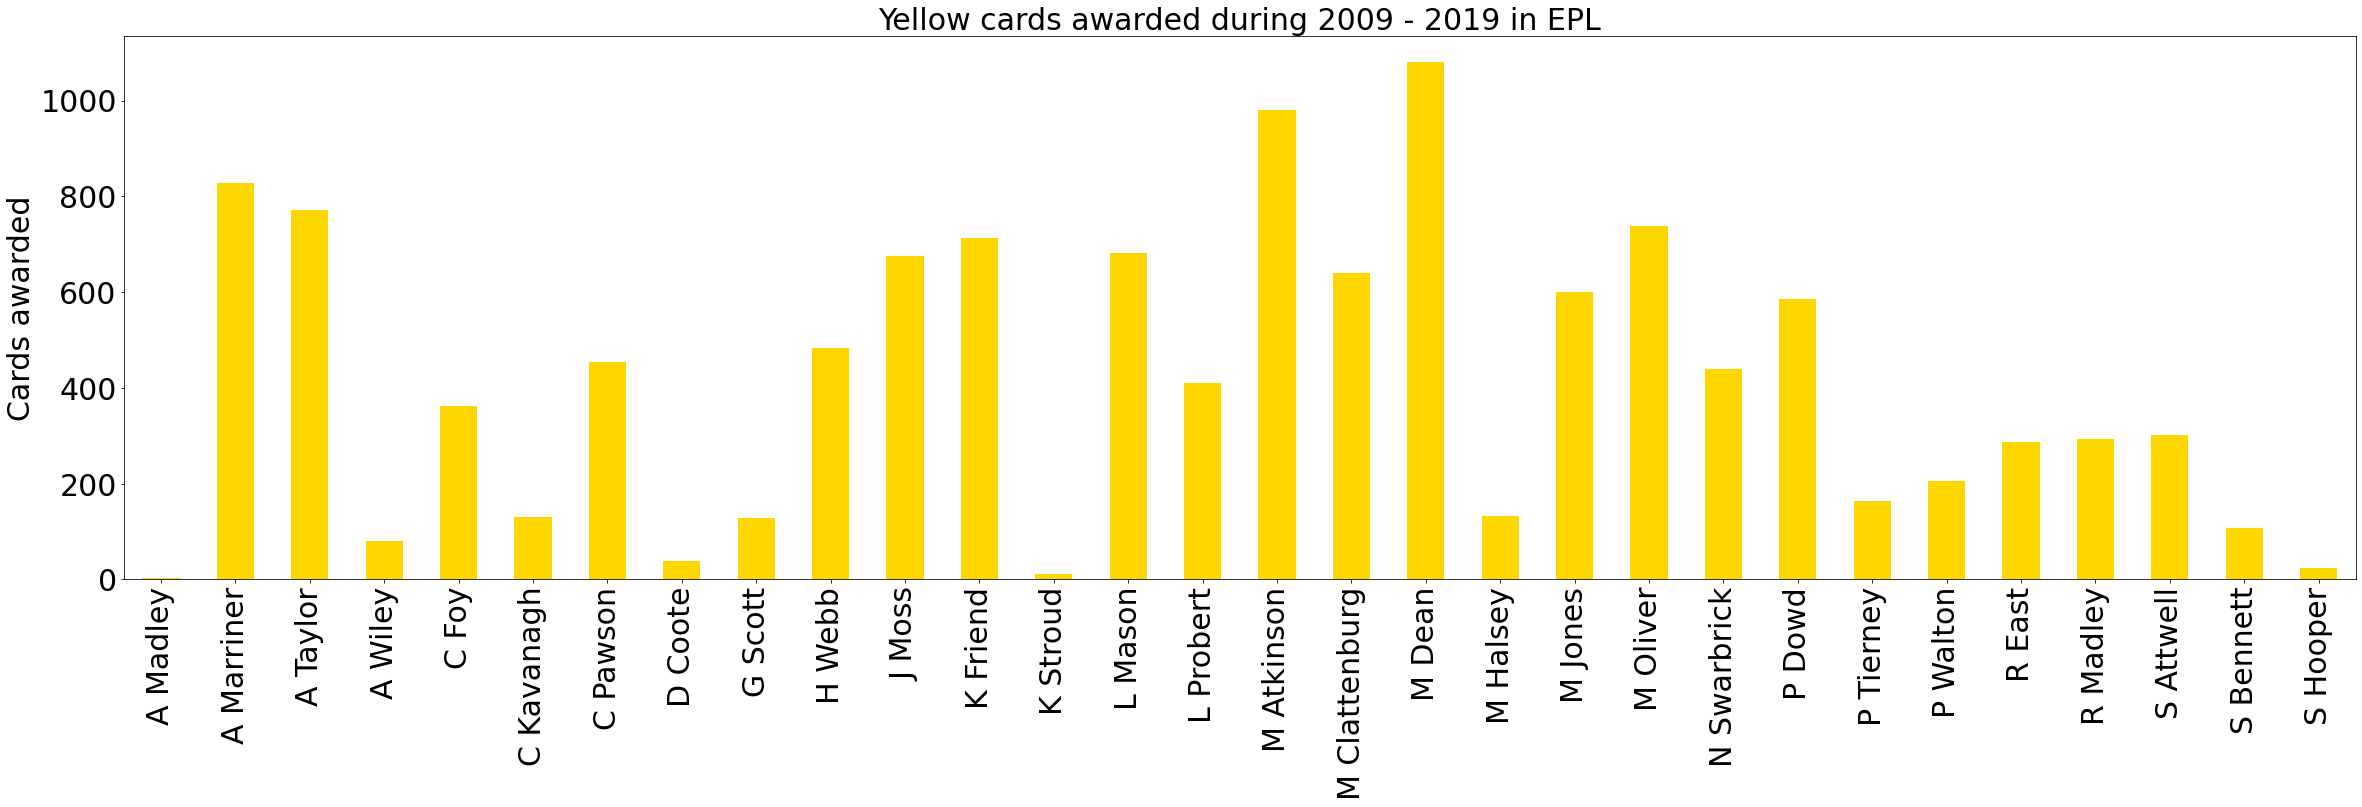

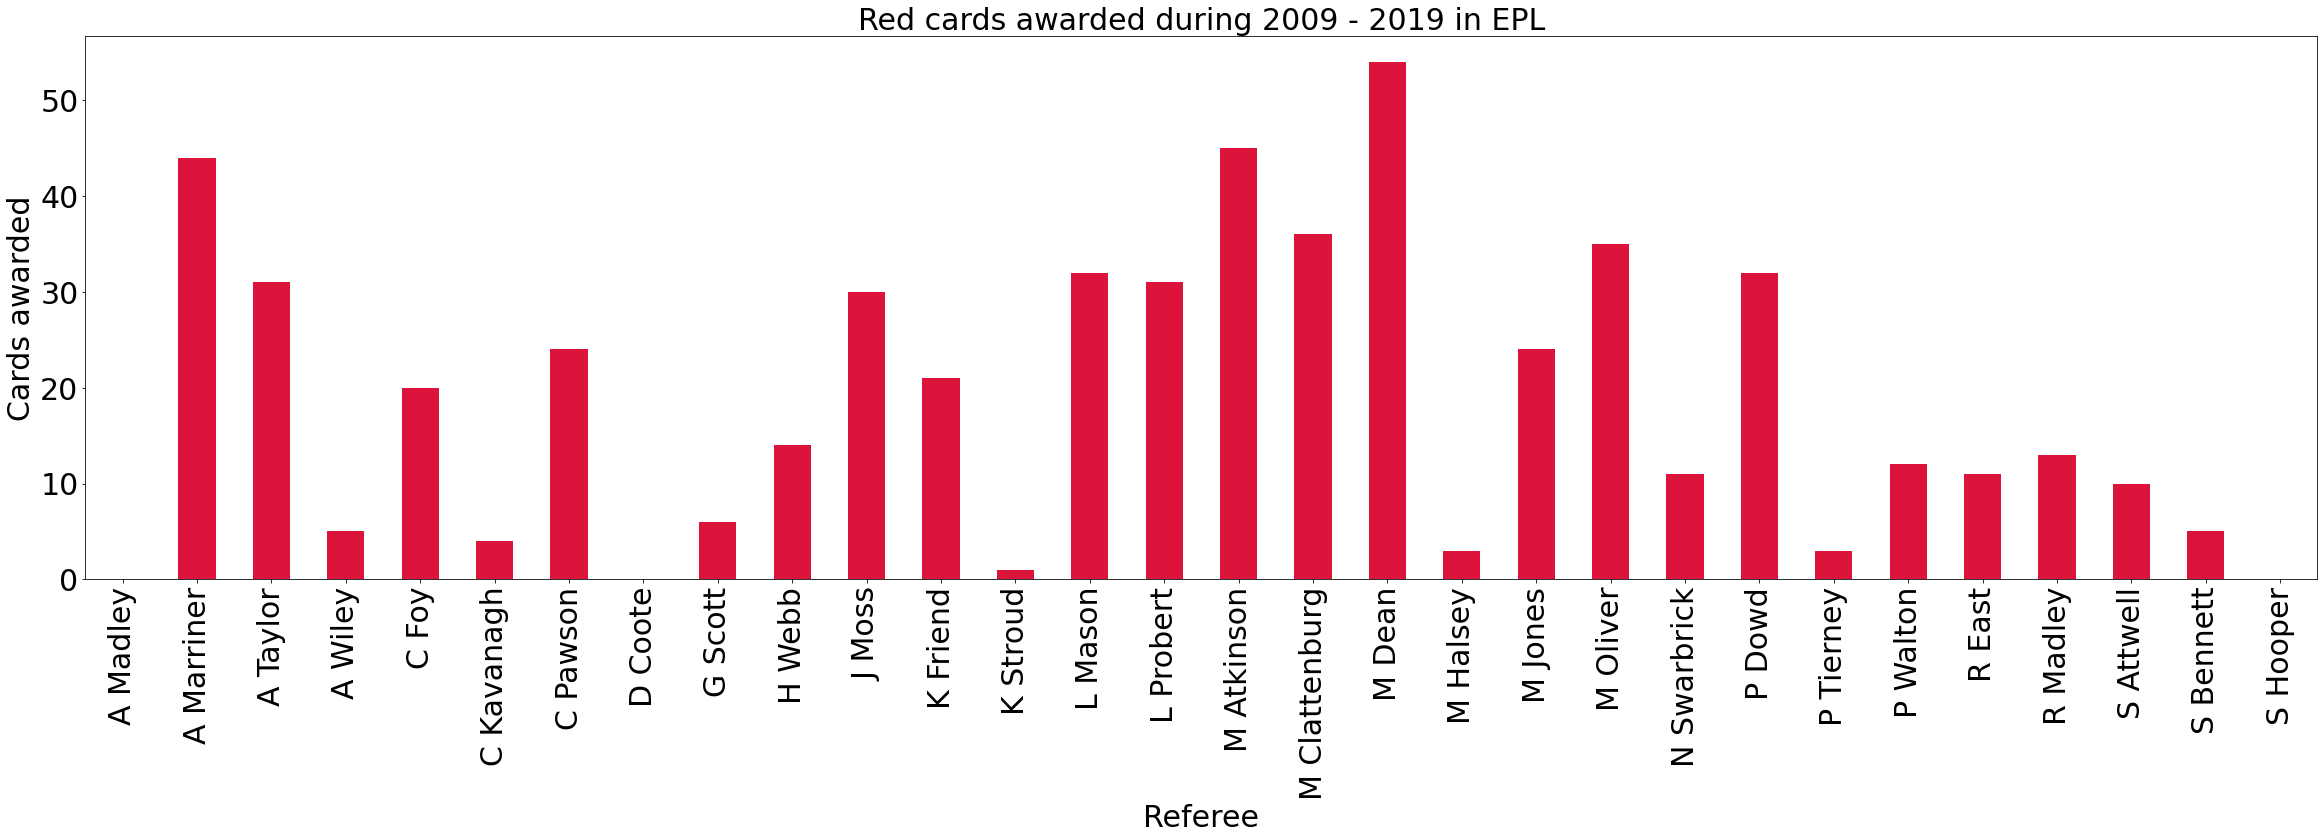

In [71]:
ax1 = each_referee_card_stats.plot( y=["YellowsTotal"], kind="bar",
                          legend=False, color =('gold'), figsize=(40,10),
                          title='Yellow cards awarded during 2009 - 2019 in EPL', fontsize=30)

ax1.set(xlabel='', ylabel='Cards awarded') #we dont give x label here. Both plots will have same x axis.
ax1.title.set_size(30)
ax1yaxis_label = ax1.yaxis.get_label()
ax1yaxis_label.set_fontsize(30)

ax2 = each_referee_card_stats.plot( y=["RedsTotal"], kind="bar", 
                          legend=False, color =('crimson'), figsize=(40,10), 
                          title='Red cards awarded during 2009 - 2019 in EPL', fontsize=30)

ax2.set(xlabel='Referee', ylabel='Cards awarded')
ax2.title.set_size(30)
ax2yaxis_label = ax2.yaxis.get_label()
ax2yaxis_label.set_fontsize(30)

ax2xaxis_label = ax2.xaxis.get_label()
ax2xaxis_label.set_fontsize(30)

plt.show()

## <font color=blue>22. Find the total number of fouls commited by each team @ home and away.<br>$\;\;\;\;$ Plot the average fouls commited per game @ home and away by each team.<font/>

#### <font color=violet>We group the fouls at home and away by each team and add them.<font/>

In [72]:
home_fouls = decade_data_by_seasons['H_Foul'].groupby(decade_data_by_seasons['HomeTeam']).sum()
away_fouls = decade_data_by_seasons['A_Foul'].groupby(decade_data_by_seasons['AwayTeam']).sum()


each_team_foul_stats = pd.DataFrame(index = each_team_games.index)
each_team_foul_stats = pd.concat([each_team_games, pd.DataFrame(home_fouls), pd.DataFrame(away_fouls), 
                                  pd.DataFrame(home_fouls + away_fouls)], axis=1)

each_team_foul_stats.columns = ['Total Games', 'FoulsCommitted@Home', 'FoulsCommitted@Away', 'TotalFoulsCommitted']


#HGF - HomeGameFoul; AGF - AwayGameFoul
each_team_foul_stats['AvgHGF'] = (each_team_foul_stats['FoulsCommitted@Home']/
                                  (each_team_foul_stats['Total Games']/2)).round(2)

each_team_foul_stats['AvgAGF'] = (each_team_foul_stats['FoulsCommitted@Away']/
                                  (each_team_foul_stats['Total Games']/2)).round(2)

each_team_foul_stats

,Total Games,FoulsCommitted@Home,FoulsCommitted@Away,TotalFoulsCommitted,AvgHGF,AvgAGF
Arsenal,380,1937,1915,3852,10.19,10.08
Aston Villa,266,1448,1585,3033,10.89,11.92
Birmingham,76,390,417,807,10.26,10.97
Blackburn,114,717,689,1406,12.58,12.09
Blackpool,38,216,187,403,11.37,9.84
Bolton,114,700,728,1428,12.28,12.77
Bournemouth,152,700,706,1406,9.21,9.29
Brighton,76,419,457,876,11.03,12.03
Burnley,190,978,997,1975,10.29,10.49
Cardiff,76,362,364,726,9.53,9.58


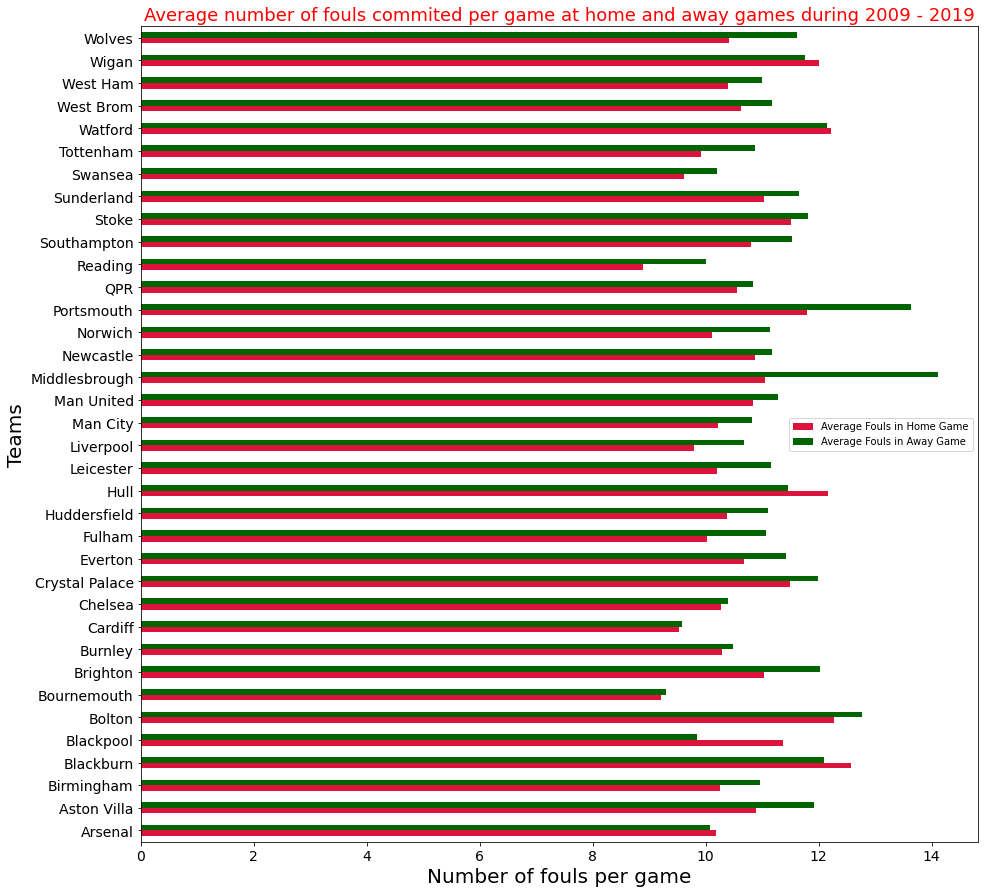

In [73]:
each_team_foul_stats.plot(y=["AvgHGF", "AvgAGF"], 
                          kind="barh", legend=True, figsize=(15,15), color = ['crimson', 'darkgreen'], 
                          label=['Average Fouls in Home Game', 'Average Fouls in Away Game'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Teams',fontsize=20)
plt.xlabel('Number of fouls per game',fontsize=20)
plt.title('Average number of fouls commited per game at home and away games during 2009 - 2019',fontsize=18, color='red') 
plt.show()

## <font color=blue>23. Find the yellow card per foul in % and red card per foul in % for every team.<br>$\;\;\;\;$ Plot the result in separate bar plots.<font/>

#### <font color=violet>We construct a new dataframe by using the following:<br>$\;\;\;\;$a) TotalFoulsCommitted from each_team_foul_stats.<br>$\;\;\;\;$b) TotalYellows and TotalReds from each_team_card_stats<font/>

In [74]:
each_team_fouls_to_cards = pd.DataFrame(index = each_team_games.index)
each_team_fouls_to_cards = pd.concat([each_team_games, each_team_foul_stats['TotalFoulsCommitted'], 
                                  each_team_card_stats['TotalYellows'], 
                                  each_team_card_stats['TotalReds']], axis=1)

each_team_fouls_to_cards['YellowsPerFoul %'] = ((each_team_fouls_to_cards['TotalYellows']/
                                             each_team_fouls_to_cards['TotalFoulsCommitted'])*100).round(2)

each_team_fouls_to_cards['RedsPerFoul %'] = ((each_team_fouls_to_cards['TotalReds']/
                                             each_team_fouls_to_cards['TotalFoulsCommitted'])*100).round(2)

each_team_fouls_to_cards

,Total Games,TotalFoulsCommitted,TotalYellows,TotalReds,YellowsPerFoul %,RedsPerFoul %
Arsenal,380,3852,591,33,15.34,0.86
Aston Villa,266,3033,499,19,16.45,0.63
Birmingham,76,807,131,4,16.23,0.50
Blackburn,114,1406,192,11,13.66,0.78
Blackpool,38,403,47,2,11.66,0.50
Bolton,114,1428,193,15,13.52,1.05
Bournemouth,152,1406,218,6,15.50,0.43
Brighton,76,876,114,6,13.01,0.68
Burnley,190,1975,326,7,16.51,0.35
Cardiff,76,726,114,2,15.70,0.28


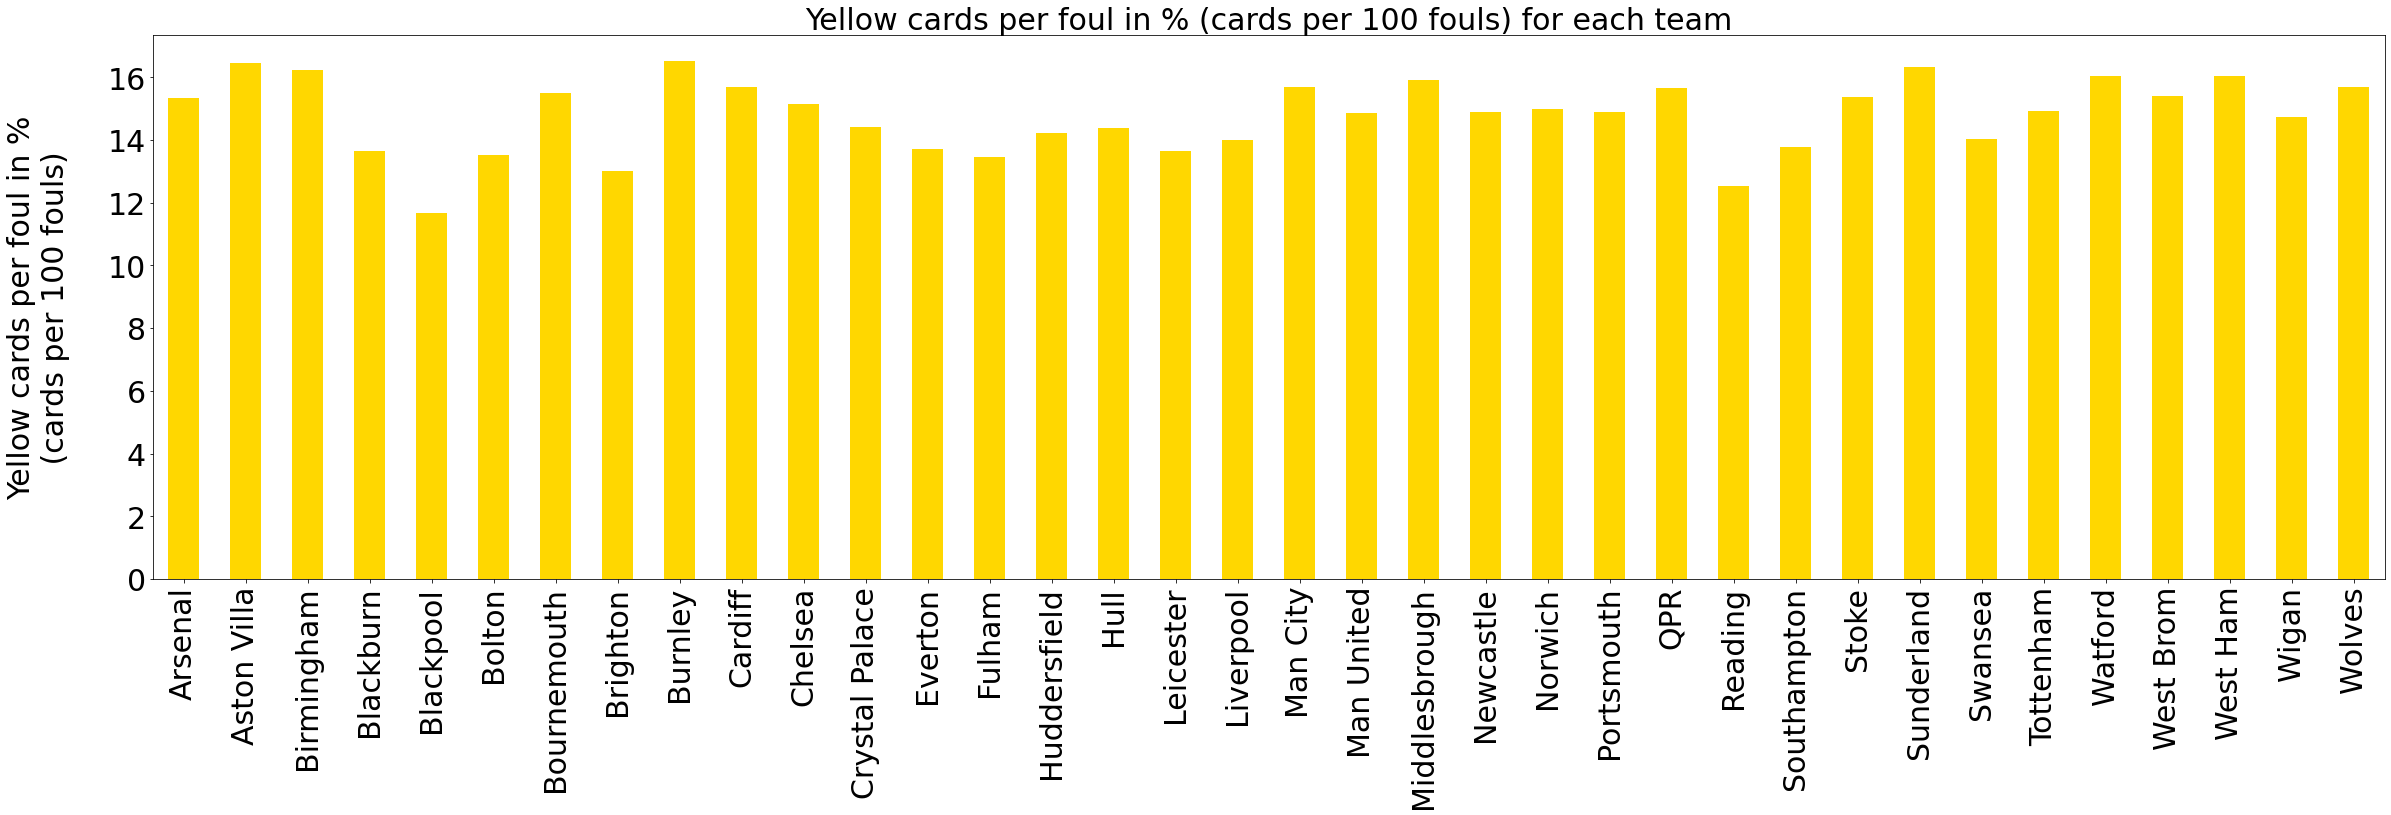

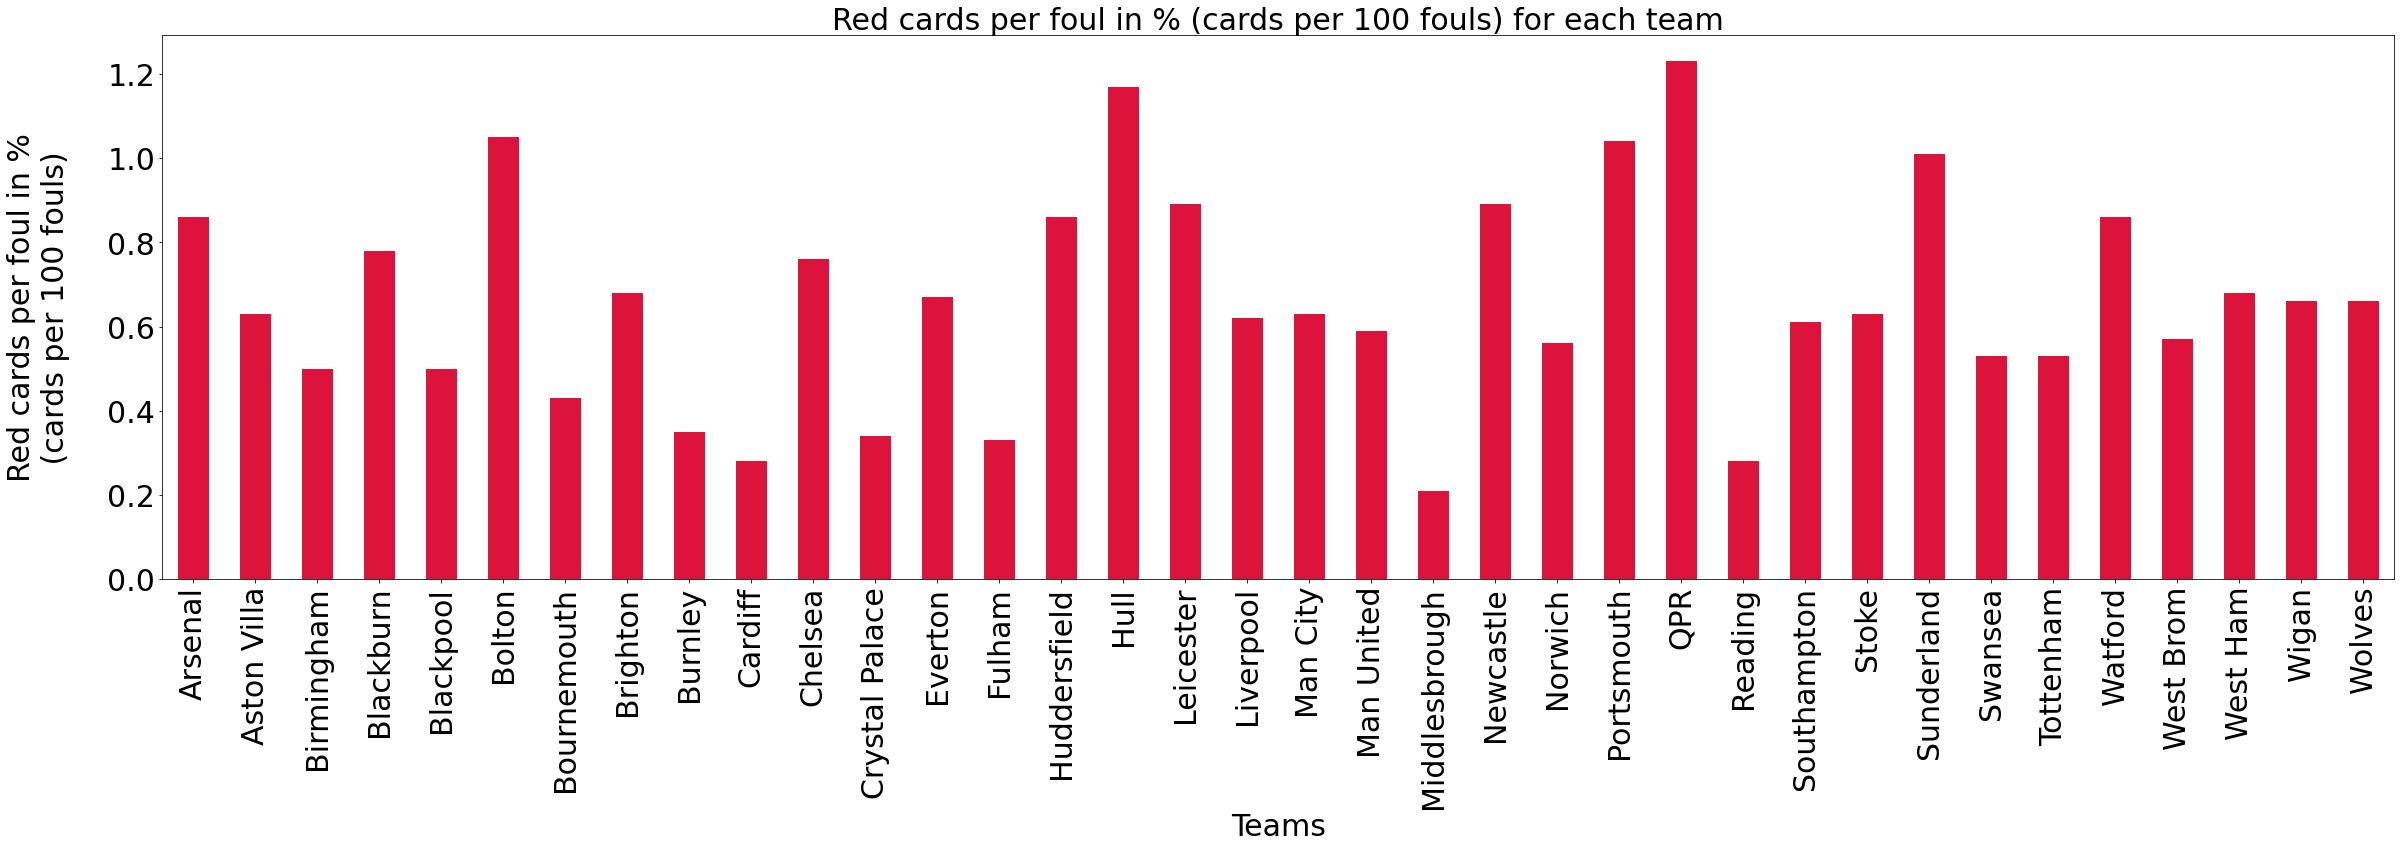

In [75]:
ax1 = each_team_fouls_to_cards.plot( y=["YellowsPerFoul %"], kind="bar",
                          legend=False, color =('gold'), figsize=(40,10),
                          title='Yellow cards per foul in % (cards per 100 fouls) for each team', fontsize=30)

ax1.set(xlabel='', ylabel='Yellow cards per foul in %\n (cards per 100 fouls) \n') #we dont give x label here. Both plots will have same x axis.
ax1.title.set_size(30)
ax1yaxis_label = ax1.yaxis.get_label()
ax1yaxis_label.set_fontsize(30)

ax2 = each_team_fouls_to_cards.plot( y=["RedsPerFoul %"], kind="bar", 
                          legend=False, color =('crimson'), figsize=(40,10), 
                          title='Red cards per foul in % (cards per 100 fouls) for each team', fontsize=30)

ax2.set(xlabel='Teams', ylabel='Red cards per foul in %\n (cards per 100 fouls) \n')
ax2.title.set_size(30)
ax2yaxis_label = ax2.yaxis.get_label()
ax2yaxis_label.set_fontsize(30)

ax2xaxis_label = ax2.xaxis.get_label()
ax2xaxis_label.set_fontsize(30)

plt.show()

## <font color=blue>24. Find the corners gained/conceded during home and away games for each team.<br>$\;\;\;\;$ Also find the total corners gained and conceded during 2009 - 2019.<br>$\;\;\;\;$ For teams who played all 10 seasons: <br>$\;\;\;\;\;\;$ a) Find the average corners conceded/gained at home & away per game.<br>$\;\;\;\;\;\;$ b) Plot the result as a bar plot.<font/>

#### <font color=violet>We group the corners for home side by home team and also group the corners for away side by away team.<br>We add them to get total corners gained<br>We group the corners for away side by home team and also group the corners for home side by away team.<br>We add them to get total corners conceded<br><font/>

In [76]:
each_team_home_corners_gained = decade_data_by_seasons['H_Corner'].groupby(decade_data_by_seasons['HomeTeam']).sum()
each_team_home_corners_conceded = decade_data_by_seasons['A_Corner'].groupby(decade_data_by_seasons['HomeTeam']).sum()

each_team_away_corners_gained = decade_data_by_seasons['A_Corner'].groupby(decade_data_by_seasons['AwayTeam']).sum()
each_team_away_corners_conceded = decade_data_by_seasons['H_Corner'].groupby(decade_data_by_seasons['AwayTeam']).sum()


each_team_corner_stats = pd.DataFrame(index = each_team_games.index)
each_team_corner_stats = pd.concat([each_team_games, pd.DataFrame(each_team_home_corners_gained), 
                                    pd.DataFrame(each_team_home_corners_conceded),
                                    pd.DataFrame(each_team_away_corners_gained), 
                                    pd.DataFrame(each_team_away_corners_conceded), 
                                    pd.DataFrame(each_team_home_corners_gained + each_team_away_corners_gained), 
                                    pd.DataFrame(each_team_home_corners_conceded + each_team_away_corners_conceded)], 
                                   axis=1)

#CG - Corners Gained; CC - Corners Conceded
each_team_corner_stats.columns = ['Total Games', 'CG@Home', 'CC@Home', 
                                  'CG@Away', 'CC@Away', 
                                  'TotalCG', 'TotalCC']

#HCG - HomeCornersGained; HCC - HomeCornersConceded; ACG - AwayCornersGained; ACC - AwayCornersConceded
each_team_corner_stats['AvgHCG'] = (each_team_corner_stats['CG@Home']/
                                    (each_team_corner_stats['Total Games']/2)).round(2)

each_team_corner_stats['AvgHCC'] = (each_team_corner_stats['CC@Home']/
                                    (each_team_corner_stats['Total Games']/2)).round(2)

each_team_corner_stats['AvgACG'] = (each_team_corner_stats['CG@Away']/
                                    (each_team_corner_stats['Total Games']/2)).round(2)

each_team_corner_stats['AvgACC'] = (each_team_corner_stats['CC@Away']/
                                    (each_team_corner_stats['Total Games']/2)).round(2)

each_team_corner_stats

,Total Games,CG@Home,CC@Home,CG@Away,CC@Away,TotalCG,TotalCC,AvgHCG,AvgHCC,AvgACG,AvgACC
Arsenal,380,1383,767,1006,956,2389,1723,7.28,4.04,5.29,5.03
Aston Villa,266,780,806,593,904,1373,1710,5.86,6.06,4.46,6.80
Birmingham,76,192,240,149,252,341,492,5.05,6.32,3.92,6.63
Blackburn,114,288,329,235,413,523,742,5.05,5.77,4.12,7.25
Blackpool,38,94,123,92,143,186,266,4.95,6.47,4.84,7.53
Bolton,114,314,359,291,426,605,785,5.51,6.30,5.11,7.47
Bournemouth,152,438,361,383,450,821,811,5.76,4.75,5.04,5.92
Brighton,76,180,185,139,259,319,444,4.74,4.87,3.66,6.82
Burnley,190,443,514,363,681,806,1195,4.66,5.41,3.82,7.17
Cardiff,76,205,235,159,284,364,519,5.39,6.18,4.18,7.47


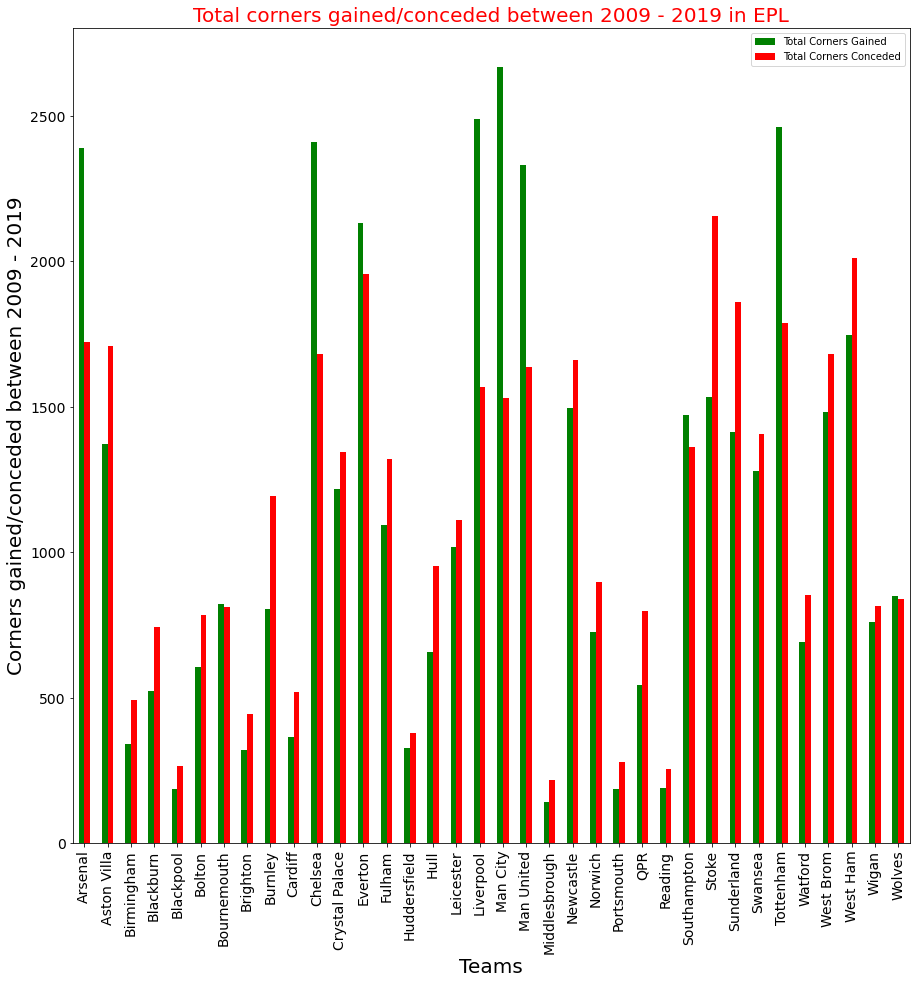

In [77]:
each_team_corner_stats.plot(y=["TotalCG", "TotalCC"], 
                            kind="bar", legend=True, figsize=(15,15), color = ['green', 'red'], 
                            label=['Total Corners Gained', 'Total Corners Conceded'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Corners gained/conceded between 2009 - 2019',fontsize=20)
plt.xlabel('Teams',fontsize=20)
plt.title('Total corners gained/conceded between 2009 - 2019 in EPL',fontsize=20, color='red') 
plt.show()

#### <font color=violet>To extract the corner stats of the teams who played all 10 seasons,<br>we match the index of each_team_corner_stats with the index of ten_season_teams.<font/>

In [78]:
corner_stats_ten_season_teams = each_team_corner_stats[each_team_corner_stats.index.isin(ten_season_teams.index)]
corner_stats_ten_season_teams

,Total Games,CG@Home,CC@Home,CG@Away,CC@Away,TotalCG,TotalCC,AvgHCG,AvgHCC,AvgACG,AvgACC
Arsenal,380,1383,767,1006,956,2389,1723,7.28,4.04,5.29,5.03
Chelsea,380,1333,780,1079,901,2412,1681,7.02,4.11,5.68,4.74
Everton,380,1201,878,932,1080,2133,1958,6.32,4.62,4.91,5.68
Liverpool,380,1371,717,1119,850,2490,1567,7.22,3.77,5.89,4.47
Man City,380,1490,709,1179,822,2669,1531,7.84,3.73,6.21,4.33
Man United,380,1293,698,1037,939,2330,1637,6.81,3.67,5.46,4.94
Tottenham,380,1366,815,1096,972,2462,1787,7.19,4.29,5.77,5.12


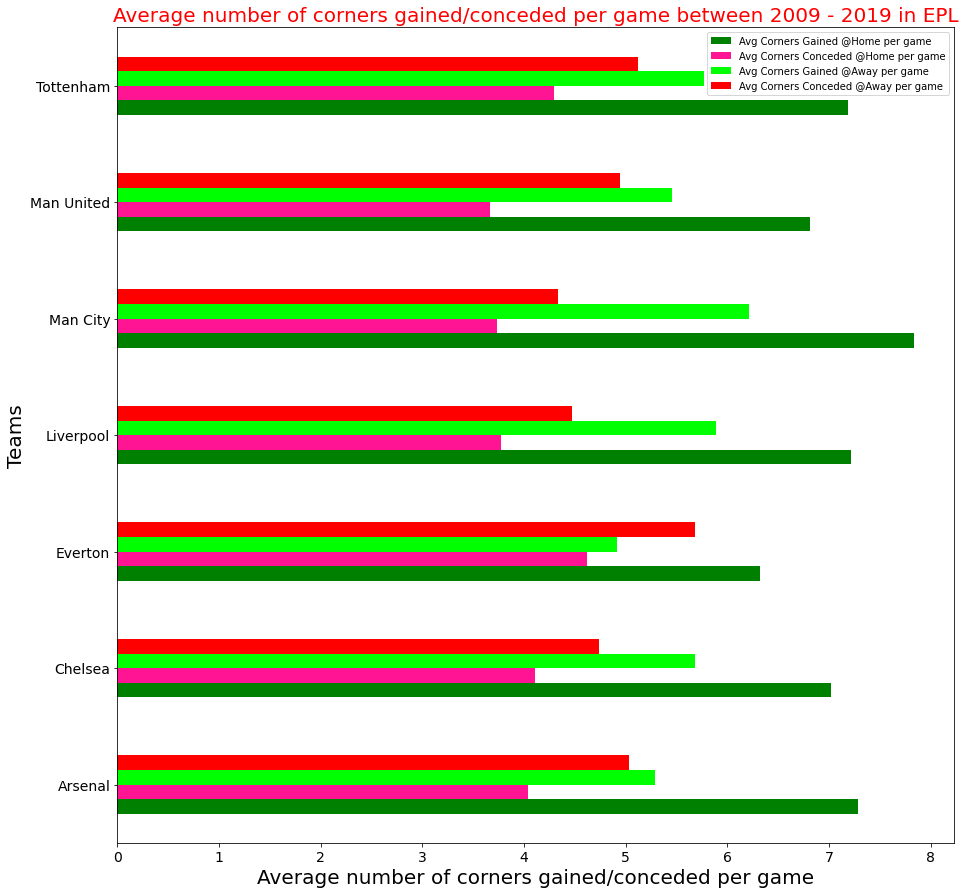

In [79]:
corner_stats_ten_season_teams.plot(y=["AvgHCG", "AvgHCC", "AvgACG", "AvgACC"], 
                                   kind="barh", legend=True, figsize=(15,15), color = ['green', 'deeppink' , 'lime', 'red'], 
                                   label = ['Avg Corners Gained @Home per game', 'Avg Corners Conceded @Home per game', 
                                           'Avg Corners Gained @Away per game', 'Avg Corners Conceded @Away per game'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Average number of corners gained/conceded per game',fontsize=20)
plt.ylabel('Teams',fontsize=20)
plt.title('Average number of corners gained/conceded per game between 2009 - 2019 in EPL',fontsize=20, color='red') 
plt.show()

## <font color=blue>25. Find the EPL champions of each year with their points.<br>$\;\;\;\;$ If 2 teams have equal points in a season, find the champion by goal difference.<br>$\;\;\;\;$ (Total Goals Scored - Total Goals Conceded)<br>$\;\;\;\;$ Find howmany teams became EPL champions during 2009 - 2019. List their names.<br>$\;\;\;\;$ Find the team which won the EPL more times between 2009 - 2019.<br>$\;\;\;\;$ Plot the teams with number of EPL trophies in the decade as a donut plot.<font/>

#### <font color=violet>To find the teams which earned maximum points every season,<br>we group the points earned by each team by season and get the maximum for every season.<font/>

In [80]:
max_points_teams_per_season = season_points_per_team.groupby([season_points_per_team.
                                                    index])['Points'].transform(max) == season_points_per_team['Points']

season_points_per_team[max_points_teams_per_season]

,Team,H_Wins,A_Wins,H_Draws,A_Draws,Points
Season,,,,,,
09-10,Chelsea,17.0,10.0,1.0,4.0,86.0
10-11,Man United,18.0,5.0,1.0,10.0,80.0
11-12,Man City,18.0,10.0,1.0,4.0,89.0
11-12,Man United,15.0,13.0,2.0,3.0,89.0
12-13,Man United,16.0,12.0,0.0,5.0,89.0
13-14,Man City,17.0,10.0,1.0,4.0,86.0
14-15,Chelsea,15.0,11.0,4.0,5.0,87.0
15-16,Leicester,12.0,11.0,6.0,6.0,81.0
16-17,Chelsea,17.0,13.0,0.0,3.0,93.0


#### <font color=red>From the above data frame we notice that, in the season 11-12, there are two teams with same points.<br>In such a case, we have to consider the goal difference to figure out which team were champions. <font/>

#### <font color=violet>We make a new dataframe with the goal difference of each team per season.<font/>

In [81]:
#Find goals scored by each team per season (home + away)
season_home_goals_scored = pd.DataFrame( decade_data_by_seasons['FT_Home_Goal']
                                .groupby([decade_data_by_seasons.Season, decade_data_by_seasons.HomeTeam]).sum()
                                .unstack().fillna(0).stack()).reset_index()

season_home_goals_scored.columns = ['Season', 'Team', 'HGoals_Scored']

season_away_goals_scored = pd.DataFrame( decade_data_by_seasons['FT_Away_Goal']
                                .groupby([decade_data_by_seasons.Season, decade_data_by_seasons.AwayTeam]).sum()
                                .unstack().fillna(0).stack()).reset_index()

season_away_goals_scored.columns = ['Season', 'Team', 'AGoals_Scored']


season_total_goals_scored = pd.DataFrame()
season_total_goals_scored = pd.concat([season_home_goals_scored.Season, season_home_goals_scored.Team, 
                                       pd.DataFrame(season_home_goals_scored['HGoals_Scored'] + 
                                                    season_away_goals_scored['AGoals_Scored'])],
                                      axis=1)


season_total_goals_scored.columns = ['Season', 'Team', 'Total_Goals_Scored']


#Find goals conceded by each team per season (home + away)
season_home_goals_conceded = pd.DataFrame( decade_data_by_seasons['FT_Away_Goal']
                                .groupby([decade_data_by_seasons.Season, decade_data_by_seasons.HomeTeam]).sum()
                                .unstack().fillna(0).stack()).reset_index()

season_home_goals_conceded.columns = ['Season', 'Team', 'HGoals_Conceded']

season_away_goals_conceded = pd.DataFrame( decade_data_by_seasons['FT_Home_Goal']
                                .groupby([decade_data_by_seasons.Season, decade_data_by_seasons.AwayTeam]).sum()
                                .unstack().fillna(0).stack()).reset_index()

season_away_goals_conceded.columns = ['Season', 'Team', 'AGoals_Conceded']


season_total_goals_conceded = pd.DataFrame()
season_total_goals_conceded = pd.concat([season_home_goals_conceded.Season, season_home_goals_conceded.Team, 
                                       pd.DataFrame(season_home_goals_conceded['HGoals_Conceded'] + 
                                                    season_away_goals_conceded['AGoals_Conceded'])],
                                      axis=1)

season_total_goals_conceded.columns = ['Season', 'Team', 'Total_Goals_Conceded']


#Make a new df with Goal Difference

season_total_gd = pd.DataFrame()
season_total_gd = pd.concat([season_total_goals_scored.Season, season_total_goals_scored.Team, 
                             season_total_goals_scored.Total_Goals_Scored, season_total_goals_conceded.Total_Goals_Conceded],
                            axis=1)

season_total_gd['Goal_Difference'] = season_total_gd['Total_Goals_Scored'] - season_total_gd['Total_Goals_Conceded']


season_total_gd = season_total_gd[(season_total_gd.Total_Goals_Scored != 0)  &  (season_total_gd.Total_Goals_Conceded != 0)]
season_total_gd.set_index('Season')
#season_total_gd
season_total_gd.head()

,Season,Team,Total_Goals_Scored,Total_Goals_Conceded,Goal_Difference
0,09-10,Arsenal,83.0,41.0,42.0
1,09-10,Aston Villa,52.0,39.0,13.0
2,09-10,Birmingham,38.0,47.0,-9.0
3,09-10,Blackburn,41.0,55.0,-14.0
5,09-10,Bolton,42.0,67.0,-25.0


#### <font color=violet>We concatenate the data frame having goal difference with the dataframe having points of each team per season.<font/>

In [82]:
season_total_gd.index = season_points_per_team.index


season_points_per_team_with_goal_diff = pd.concat([season_points_per_team, season_total_gd.Total_Goals_Scored, 
                                                   season_total_gd.Total_Goals_Conceded, season_total_gd.Goal_Difference], 
                                                  axis=1, sort=False)

#season_points_per_team_with_goal_diff
season_points_per_team_with_goal_diff.head()

,Team,H_Wins,A_Wins,H_Draws,A_Draws,Points,Total_Goals_Scored,Total_Goals_Conceded,Goal_Difference
Season,,,,,,,,,
09-10,Arsenal,15.0,8.0,2.0,4.0,75.0,83.0,41.0,42.0
09-10,Aston Villa,8.0,9.0,8.0,5.0,64.0,52.0,39.0,13.0
09-10,Birmingham,8.0,5.0,9.0,2.0,50.0,38.0,47.0,-9.0
09-10,Blackburn,10.0,3.0,6.0,5.0,50.0,41.0,55.0,-14.0
09-10,Bolton,6.0,4.0,6.0,3.0,39.0,42.0,67.0,-25.0


#### <font color=violet>To find the teams which earned maximum points every season,<br>we group the points earned by each team by season and get the maximum for every season.<font/>

In [83]:
max_points_teams_each_season = season_points_per_team_with_goal_diff.groupby([
    season_points_per_team_with_goal_diff.index])['Points'].transform(max) == season_points_per_team_with_goal_diff['Points']


max_points_teams_per_season = season_points_per_team_with_goal_diff[max_points_teams_each_season]
max_points_teams_per_season = max_points_teams_per_season.reset_index()
max_points_teams_per_season

,Season,Team,H_Wins,A_Wins,H_Draws,A_Draws,Points,Total_Goals_Scored,Total_Goals_Conceded,Goal_Difference
0,09-10,Chelsea,17.0,10.0,1.0,4.0,86.0,103.0,32.0,71.0
1,10-11,Man United,18.0,5.0,1.0,10.0,80.0,78.0,37.0,41.0
2,11-12,Man City,18.0,10.0,1.0,4.0,89.0,93.0,29.0,64.0
3,11-12,Man United,15.0,13.0,2.0,3.0,89.0,89.0,33.0,56.0
4,12-13,Man United,16.0,12.0,0.0,5.0,89.0,86.0,43.0,43.0
5,13-14,Man City,17.0,10.0,1.0,4.0,86.0,102.0,37.0,65.0
6,14-15,Chelsea,15.0,11.0,4.0,5.0,87.0,73.0,32.0,41.0
7,15-16,Leicester,12.0,11.0,6.0,6.0,81.0,68.0,36.0,32.0
8,16-17,Chelsea,17.0,13.0,0.0,3.0,93.0,85.0,33.0,52.0
9,17-18,Man City,16.0,16.0,2.0,2.0,100.0,106.0,27.0,79.0


#### <font color=violet>Now we can also make use of the goal difference in case two teams have same points.<br>We make a new dataframe and use the dataframe max_points_teams_per_season to filter only the team with the highest goal difference in case more than one team had same points at the end of the season.<font/>

In [84]:
champions = pd.DataFrame()

for season in max_points_teams_per_season.Season.unique():
    seasonal_top_pointers = max_points_teams_per_season[max_points_teams_per_season['Season']==season]
    seasonal_top_pointers_with_gd = seasonal_top_pointers[seasonal_top_pointers['Goal_Difference']==
                                                          seasonal_top_pointers['Goal_Difference'].max()]
    champions = champions.append(seasonal_top_pointers_with_gd)

champions = champions.set_index('Season')
champions

,Team,H_Wins,A_Wins,H_Draws,A_Draws,Points,Total_Goals_Scored,Total_Goals_Conceded,Goal_Difference
Season,,,,,,,,,
09-10,Chelsea,17.0,10.0,1.0,4.0,86.0,103.0,32.0,71.0
10-11,Man United,18.0,5.0,1.0,10.0,80.0,78.0,37.0,41.0
11-12,Man City,18.0,10.0,1.0,4.0,89.0,93.0,29.0,64.0
12-13,Man United,16.0,12.0,0.0,5.0,89.0,86.0,43.0,43.0
13-14,Man City,17.0,10.0,1.0,4.0,86.0,102.0,37.0,65.0
14-15,Chelsea,15.0,11.0,4.0,5.0,87.0,73.0,32.0,41.0
15-16,Leicester,12.0,11.0,6.0,6.0,81.0,68.0,36.0,32.0
16-17,Chelsea,17.0,13.0,0.0,3.0,93.0,85.0,33.0,52.0
17-18,Man City,16.0,16.0,2.0,2.0,100.0,106.0,27.0,79.0


In [85]:
print('The different teams to be crowned EPL champions between 2009 - 2019 are : \n' + str(champions.Team.unique()))

The different teams to be crowned EPL champions between 2009 - 2019 are : 
['Chelsea' 'Man United' 'Man City' 'Leicester']


In [86]:
champions_with_trophy_count = pd.DataFrame(champions['Team'].value_counts())
champions_with_trophy_count.columns = ['Trophy_Number']
champions_with_trophy_count

,Trophy_Number
Man City,4
Chelsea,3
Man United,2
Leicester,1


In [87]:
team_with_max_epl_trophy = champions_with_trophy_count[champions_with_trophy_count['Trophy_Number']==
                                                          champions_with_trophy_count['Trophy_Number'].max()]
team_with_max_epl_trophy

,Trophy_Number
Man City,4


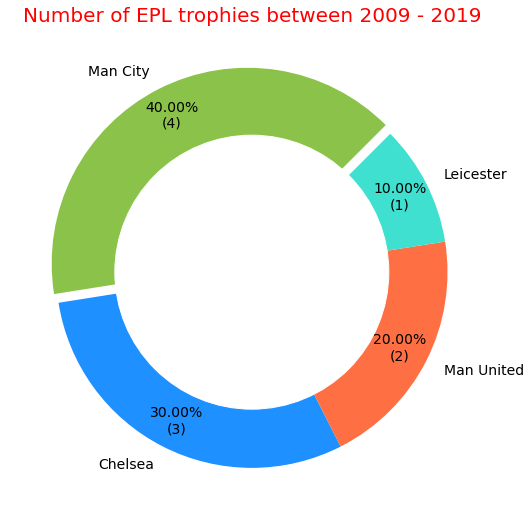

In [88]:
def value_and_percentage(x): 
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)


plt.figure(figsize=(9,9))
values = champions_with_trophy_count.Trophy_Number
labels = champions_with_trophy_count.index.unique()
total = np.sum(values)
colors = ['#8BC34A','dodgerblue','#FE7043','Turquoise']
plt.pie (values , colors = colors ,  labels = labels,
         startangle=45 , autopct=value_and_percentage, pctdistance=0.85, 
         textprops={'fontsize': 14}, explode=[0.05,0,0,0] )

my_circle=plt.Circle( (0,0), 0.7, color='white') # Adding circle at the centre
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Number of EPL trophies between 2009 - 2019',fontsize=20, color='red')
plt.show()

<h2 align="center"> <font color=green>Suggestions to improve this notebook are welcome.<font/> </h2>

### <font color=blue>The notebook and the data files are located in my GitHub account.<font/><br><br><font color=crimson>GitHub: https://github.com/aj7amigo<font/>

### Thank you,<br> <font color=brown>AKHIL JAMES<font/> 

<img src="https://miro.medium.com/max/681/1*-BoC1TULqBUhCw-TdGaBgQ.png" alt="Drawing" style="width: 400px;"/>